In [329]:
import squidpy as sq
import numpy as np
import pandas as pd
import numba.types as nt

it = nt.int32
ft = nt.float32
tt = nt.UniTuple
ip = np.int32
fp = np.float32
dt = nt.uint32 
ndt = np.uint32

In [2]:
%matplotlib inline

# Load data

In [330]:
import datatable

In [331]:
pkhl_meta = datatable.fread("/Users/brendan/Desktop/PostDoc/work/HuBMAP/repos/multiscale_celltype_colocalization_analysis/data/CODEX/HBM389.PKHL.936.meta.csv.gz")
pkhl_meta = pkhl_meta.to_pandas()
pkhl_meta.head()

C0   x    y  cellarea com_nn50_VolnormExpr_data_annots
0   1   0  -32       303                 Sinusoidal cells
1   2   0  -78       123                    Myeloid cells
2   3  13   -4       137                    Myeloid cells
3   4   7  -58       387                 Sinusoidal cells
4   5   0 -129       191            Neutrophils/Monocytes

In [335]:
pkhl_meta.iloc[:,1:3]

x     y
0          0   -32
1          0   -78
2         13    -4
3          7   -58
4          0  -129
...      ...   ...
154441  9399 -9052
154442  9385 -8740
154443  9407 -8722
154444  9385 -8962
154445  9385 -9071

[154446 rows x 2 columns]

In [336]:
# I think the co-occurances are coming out as nans and thus not plotted because the y is negative?
pkhl_meta['y'] = pkhl_meta['y'] * -1
pkhl_meta.iloc[:,1:3]

x     y
0          0    32
1          0    78
2         13     4
3          7    58
4          0   129
...      ...   ...
154441  9399  9052
154442  9385  8740
154443  9407  8722
154444  9385  8962
154445  9385  9071

[154446 rows x 2 columns]

In [337]:
pkhl_exp = datatable.fread("/Users/brendan/Desktop/PostDoc/work/HuBMAP/repos/multiscale_celltype_colocalization_analysis/data/CODEX/HBM389.PKHL.936.exp.csv.gz")
pkhl_exp = pkhl_exp.to_pandas().astype('int64')
pkhl_exp.head()

C0  CD31   CD8  CD20  Ki67  CD3e  SMActin  Podoplanin  CD68  PanCK  ...  \
0   1   367  9043   270   200   145       17         208   203     32  ...   
1   2    60  2248   491    77    13       19          46   331     29  ...   
2   3    32  1630    21   133   224       86         145  4370     35  ...   
3   4   239  8372    41   221   156       58         217   147     33  ...   
4   5    32   279    56   795   116      129         327   196     46  ...   

   CD44  HLADR  FoxP3  CD163  CollagenIV  Vimentin   CD15  CD45  CD5  CD1c  
0   183     48    255     50         443     12596    357    70  861   269  
1   916    212     31    648         138      1421      1   120  330   121  
2   197    173  18075    756         200     10449   1750   159  298   103  
3    79     86    423    106         547     12997   2214    52  384   136  
4   190     64    808     90         397      1118  50701   274  625    72  

[5 rows x 29 columns]

In [338]:
pkhl_exp.iloc[:,1:]

CD31    CD8  CD20  Ki67  CD3e  SMActin  Podoplanin  CD68  PanCK  CD21  \
0        367   9043   270   200   145       17         208   203     32   187   
1         60   2248   491    77    13       19          46   331     29    42   
2         32   1630    21   133   224       86         145  4370     35    69   
3        239   8372    41   221   156       58         217   147     33   288   
4         32    279    56   795   116      129         327   196     46   199   
...      ...    ...   ...   ...   ...      ...         ...   ...    ...   ...   
154441     7      8    37  1796    47      165         703    33     31   117   
154442   157   2286    60    76    71       31         392   146     40   119   
154443    39    455    39  3238    89       56         165    68     42    80   
154444    87   1192   102   245    79      856         519    83     42   156   
154445   100  26569   286  2513  6956       52        1198   249     23   208   

        ...  CD44  HLADR  FoxP3  CD163  CollagenIV  Vimentin   CD15  CD45  \
0       ...   183     48    255     50         443     12596    357    70   
1       ...   916    212     31    648         138      1421      1   120   
2       ...   197    173  18075    756         200     10449   1750   159   
3       ...    79     86    423    106         547     12997   2214    52   
4       ...   190     64    808     90         397      1118  50701   274   
...     ...   ...    ...    ...    ...         ...       ...    ...   ...   
154441  ...   595     35   1265     41          91      3718  39119   143   
154442  ...   233     32    320    343        2054     21379     18    68   
154443  ...  1101     19   1743     38           6      1463  52270   176   
154444  ...   839     39    542     67        3341      4542     24    46   
154445  ...  2439     96    292     52          75      1543     56  1254   

         CD5  CD1c  
0        861   269  
1        330   121  
2        298   103  
3        384   136  
4        625    72  
...      ...   ...  
154441  1582    48  
154442   178    62  
154443  1363    47  
154444   165    55  
154445   102    95  

[154446 rows x 28 columns]

In [339]:
np.array(pkhl_meta.iloc[:,1:3], dtype=float)

array([[0.000e+00, 3.200e+01],
       [0.000e+00, 7.800e+01],
       [1.300e+01, 4.000e+00],
       ...,
       [9.407e+03, 8.722e+03],
       [9.385e+03, 8.962e+03],
       [9.385e+03, 9.071e+03]])

In [340]:
pkhl_meta['com_nn50_VolnormExpr_data_annots'] = pkhl_meta['com_nn50_VolnormExpr_data_annots'].astype("category") # like levels in R, need for squidpy stuff
pkhl_meta['com_nn50_VolnormExpr_data_annots']

0              Sinusoidal cells
1                 Myeloid cells
2                 Myeloid cells
3              Sinusoidal cells
4         Neutrophils/Monocytes
                  ...          
154441    Neutrophils/Monocytes
154442         Sinusoidal cells
154443    Neutrophils/Monocytes
154444         Sinusoidal cells
154445       CD4 Memory T cells
Name: com_nn50_VolnormExpr_data_annots, Length: 154446, dtype: category
Categories (13, object): ['B cells, red pulp', 'Blood endothelial', 'CD4 Memory T cells', 'CD8 Memory T cells', ..., 'Neutrophils/Monocytes', 'Podoplanin', 'Sinusoidal cells', 'indistinct']

In [341]:
from anndata import AnnData
from numpy.random import default_rng
rng = default_rng(42)

In [342]:
pkhl = AnnData(np.array(pkhl_exp.iloc[:,1:]), obsm={"spatial": np.array(pkhl_meta.iloc[:,1:3], dtype=float)})

/var/folders/cf/llylf0sn67j0qlvgy3_990ym0000gn/T/ipykernel_88159/3527637450.py:1: FutureWarning: X.dtype being converted to np.float32 from int64. In the next version of anndata (0.9) conversion will not be automatic. Pass dtype explicitly to avoid this warning. Pass `AnnData(X, dtype=X.dtype, ...)` to get the future behavour.
  pkhl = AnnData(np.array(pkhl_exp.iloc[:,1:]), obsm={"spatial": np.array(pkhl_meta.iloc[:,1:3], dtype=float)})


In [343]:
pkhl.obs = pkhl_meta
pkhl.obs

C0     x     y  cellarea com_nn50_VolnormExpr_data_annots
0            1     0    32       303                 Sinusoidal cells
1            2     0    78       123                    Myeloid cells
2            3    13     4       137                    Myeloid cells
3            4     7    58       387                 Sinusoidal cells
4            5     0   129       191            Neutrophils/Monocytes
...        ...   ...   ...       ...                              ...
154441  154442  9399  9052       378            Neutrophils/Monocytes
154442  154443  9385  8740       182                 Sinusoidal cells
154443  154444  9407  8722       194            Neutrophils/Monocytes
154444  154445  9385  8962       271                 Sinusoidal cells
154445  154446  9385  9071       156               CD4 Memory T cells

[154446 rows x 5 columns]

In [344]:
pkhl.uns

OverloadedDict, wrapping:
	OrderedDict()
With overloaded keys:
	['neighbors'].

# Visualize

/opt/miniconda3/envs/squidpy/lib/python3.8/site-packages/squidpy/pl/_spatial_utils.py:955: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap', 'norm' will be ignored
  _cax = scatter(


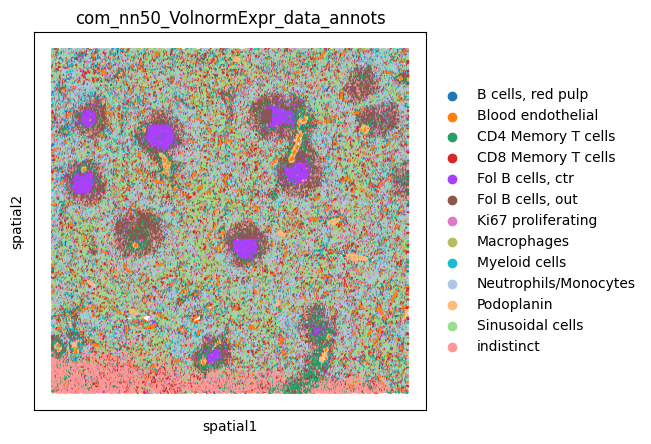

In [345]:
sq.pl.spatial_scatter(
        pkhl,
        shape=None,
        color = "com_nn50_VolnormExpr_data_annots",
        size=3
)

# co-occurance

In [301]:
sq.gr.co_occurrence(pkhl, cluster_key="com_nn50_VolnormExpr_data_annots")

100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 2926/2926 [17:57<00:00,  2.72/s]


In [302]:
pkhl.uns["com_nn50_VolnormExpr_data_annots_co_occurrence"]['occ'][:,:,0]

array([[nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan],
       [nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan],
       [nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan],
       [nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan],
       [nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan],
       [nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan],
       [nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan],
       [nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan],
       [nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan],
       [nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan],
       [nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan],
       [nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan],
       [nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan]],
      dtype=float32)

Not sure why the co_occurance values are returning nans. Something must be off with the data somehow?

try to work through the code like I did previously and maybe figure out where the error is

## check code

In [70]:
spatial = pkhl.obsm["spatial"].astype(fp)
original_clust = pkhl.obs["com_nn50_VolnormExpr_data_annots"]

In [71]:
spatial

array([[0.000e+00, 3.200e+01],
       [0.000e+00, 7.800e+01],
       [1.300e+01, 4.000e+00],
       ...,
       [9.407e+03, 8.722e+03],
       [9.385e+03, 8.962e+03],
       [9.385e+03, 9.071e+03]], dtype=float32)

In [195]:
spatial.shape

(154446, 2)

In [72]:
original_clust

0              Sinusoidal cells
1                 Myeloid cells
2                 Myeloid cells
3              Sinusoidal cells
4         Neutrophils/Monocytes
                  ...          
154441    Neutrophils/Monocytes
154442         Sinusoidal cells
154443    Neutrophils/Monocytes
154444         Sinusoidal cells
154445       CD4 Memory T cells
Name: com_nn50_VolnormExpr_data_annots, Length: 154446, dtype: category
Categories (13, object): ['B cells, red pulp', 'Blood endothelial', 'CD4 Memory T cells', 'CD8 Memory T cells', ..., 'Neutrophils/Monocytes', 'Podoplanin', 'Sinusoidal cells', 'indistinct']

In [73]:
clust_map = {v: i for i, v in enumerate(original_clust.cat.categories.values)}
labs = np.array([clust_map[c] for c in original_clust], dtype=ip)
labs_unique = np.array(list(clust_map.values()), dtype=ip)

### interval

In [191]:
# _find_min_max
from sklearn.metrics import pairwise_distances
coord_sum = np.sum(spatial, axis=1)
min_idx, min_idx2 = np.argpartition(coord_sum, 2)[:2]
max_idx = np.argmax(coord_sum)
# fmt: off
thresh_max = pairwise_distances(spatial[min_idx, :].reshape(1, -1), spatial[max_idx, :].reshape(1, -1))[0, 0] / 2.0
thresh_min = pairwise_distances(spatial[min_idx, :].reshape(1, -1), spatial[min_idx2, :].reshape(1, -1))[0, 0]

In [192]:
thresh_min

30.870699

In [193]:
thresh_max

6520.06298828125

In [194]:
coord_sum

array([3.2000e+01, 7.8000e+01, 1.7000e+01, ..., 1.8129e+04, 1.8347e+04,
       1.8456e+04], dtype=float32)

In [81]:
interval = np.linspace(thresh_min, thresh_max, num=50, dtype=fp)
interval

array([  30.870699,  163.30319 ,  295.7357  ,  428.16818 ,  560.6007  ,
        693.0332  ,  825.4657  ,  957.8982  , 1090.3307  , 1222.7632  ,
       1355.1957  , 1487.6282  , 1620.0607  , 1752.4932  , 1884.9257  ,
       2017.3582  , 2149.7905  , 2282.2231  , 2414.6555  , 2547.0881  ,
       2679.5205  , 2811.9531  , 2944.3855  , 3076.818   , 3209.2505  ,
       3341.683   , 3474.1155  , 3606.548   , 3738.9805  , 3871.413   ,
       4003.8455  , 4136.278   , 4268.7104  , 4401.143   , 4533.5757  ,
       4666.008   , 4798.4404  , 4930.873   , 5063.3057  , 5195.738   ,
       5328.1704  , 5460.603   , 5593.0356  , 5725.468   , 5857.9004  ,
       5990.333   , 6122.7656  , 6255.1978  , 6387.6304  , 6520.063   ],
      dtype=float32)

In [82]:
# check:
pkhl.uns["com_nn50_VolnormExpr_data_annots_co_occurrence"]['interval']

array([  30.870699,  163.30319 ,  295.7357  ,  428.16818 ,  560.6007  ,
        693.0332  ,  825.4657  ,  957.8982  , 1090.3307  , 1222.7632  ,
       1355.1957  , 1487.6282  , 1620.0607  , 1752.4932  , 1884.9257  ,
       2017.3582  , 2149.7905  , 2282.2231  , 2414.6555  , 2547.0881  ,
       2679.5205  , 2811.9531  , 2944.3855  , 3076.818   , 3209.2505  ,
       3341.683   , 3474.1155  , 3606.548   , 3738.9805  , 3871.413   ,
       4003.8455  , 4136.278   , 4268.7104  , 4401.143   , 4533.5757  ,
       4666.008   , 4798.4404  , 4930.873   , 5063.3057  , 5195.738   ,
       5328.1704  , 5460.603   , 5593.0356  , 5725.468   , 5857.9004  ,
       5990.333   , 6122.7656  , 6255.1978  , 6387.6304  , 6520.063   ],
      dtype=float32)

### splits

In [83]:
# we get 76 splits so just stick with this:
n_splits = 76

In [84]:
spatial_splits = tuple(s for s in np.array_split(spatial, n_splits, axis=0) if len(s))
labs_splits = tuple(s for s in np.array_split(labs, n_splits, axis=0) if len(s))
# create idx array including unique combinations and self-comparison
x, y = np.triu_indices_from(np.empty((n_splits, n_splits)))
idx_splits = [(i, j) for i, j in zip(x, y)]

In [86]:
len(spatial_splits)

76

In [87]:
len(labs_splits)

76

In [88]:
len(idx_splits)

2926

In [89]:
# all the different combos of the different splits
idx_splits

[(0, 0),
 (0, 1),
 (0, 2),
 (0, 3),
 (0, 4),
 (0, 5),
 (0, 6),
 (0, 7),
 (0, 8),
 (0, 9),
 (0, 10),
 (0, 11),
 (0, 12),
 (0, 13),
 (0, 14),
 (0, 15),
 (0, 16),
 (0, 17),
 (0, 18),
 (0, 19),
 (0, 20),
 (0, 21),
 (0, 22),
 (0, 23),
 (0, 24),
 (0, 25),
 (0, 26),
 (0, 27),
 (0, 28),
 (0, 29),
 (0, 30),
 (0, 31),
 (0, 32),
 (0, 33),
 (0, 34),
 (0, 35),
 (0, 36),
 (0, 37),
 (0, 38),
 (0, 39),
 (0, 40),
 (0, 41),
 (0, 42),
 (0, 43),
 (0, 44),
 (0, 45),
 (0, 46),
 (0, 47),
 (0, 48),
 (0, 49),
 (0, 50),
 (0, 51),
 (0, 52),
 (0, 53),
 (0, 54),
 (0, 55),
 (0, 56),
 (0, 57),
 (0, 58),
 (0, 59),
 (0, 60),
 (0, 61),
 (0, 62),
 (0, 63),
 (0, 64),
 (0, 65),
 (0, 66),
 (0, 67),
 (0, 68),
 (0, 69),
 (0, 70),
 (0, 71),
 (0, 72),
 (0, 73),
 (0, 74),
 (0, 75),
 (1, 1),
 (1, 2),
 (1, 3),
 (1, 4),
 (1, 5),
 (1, 6),
 (1, 7),
 (1, 8),
 (1, 9),
 (1, 10),
 (1, 11),
 (1, 12),
 (1, 13),
 (1, 14),
 (1, 15),
 (1, 16),
 (1, 17),
 (1, 18),
 (1, 19),
 (1, 20),
 (1, 21),
 (1, 22),
 (1, 23),
 (1, 24),
 (1, 25),
 (1, 26),

### co_occurance

```
for t in idx_splits:
    idx_x, idx_y = t
    labs_x = labs_splits[idx_x]
    labs_y = labs_splits[idx_y]
    dist = pairwise_distances(spatial_splits[idx_x], spatial_splits[idx_y])

    out = _occur_count((labs_x, labs_y), dist, labs_unique, interval)
    out_lst.append(out)
```

Let's just use the first split

In [90]:
idx_x, idx_y = idx_splits[0]
labs_x = labs_splits[idx_x]
labs_y = labs_splits[idx_y]
dist = pairwise_distances(spatial_splits[idx_x], spatial_splits[idx_y])

```
_occur_count((labs_x, labs_y), dist, labs_unique, interval)

num = labs_unique.shape[0]
out = np.zeros((num, num, interval.shape[0] - 1), dtype=ft)

for idx in range(interval.shape[0] - 1):
    co_occur = np.zeros((num, num), dtype=ft)
    probs_con = np.zeros((num, num), dtype=ft)

    thres_min = interval[idx]
    thres_max = interval[idx + 1]
    clust_x, clust_y = clust

    idx_x, idx_y = np.nonzero((pw_dist <= thres_max) & (pw_dist > thres_min))
    x = clust_x[idx_x]
    y = clust_y[idx_y]
    for i, j in zip(x, y):
        co_occur[i, j] += 1

    probs_matrix = co_occur / np.sum(co_occur)
    probs = np.sum(probs_matrix, axis=1)

    for c in labs_unique:
        probs_conditional = co_occur[c] / np.sum(co_occur[c])
        probs_con[c, :] = probs_conditional / probs

    out[:, :, idx] = probs_con
```

In [108]:
clust = tuple([labs_x, labs_y])
pw_dist = dist

In [110]:
num = labs_unique.shape[0]
out = np.zeros((num, num, interval.shape[0] - 1))

# note: was getting an error saying could not interpret data type float32? why?
# out = np.zeros((num, num, interval.shape[0] - 1), dtype=ft)

# possible error? ft = nt.float32 but I had changed with when exploring the imc to np.float32 and it worked.
# what is `numba.types` vs `numpy`? Could this be an error in squidpy?
# but co_occurance has worked for their included test data and my sims, too...

In [111]:
out

array([[[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       ...,

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0.

In [112]:
out.shape

(13, 13, 49)

In [113]:
for idx in range(interval.shape[0] - 1):
    co_occur = np.zeros((num, num), dtype=ft)
    probs_con = np.zeros((num, num), dtype=ft)

    thres_min = interval[idx]
    thres_max = interval[idx + 1]
    clust_x, clust_y = clust

    idx_x, idx_y = np.nonzero((pw_dist <= thres_max) & (pw_dist > thres_min))
    x = clust_x[idx_x]
    y = clust_y[idx_y]
    for i, j in zip(x, y):
        co_occur[i, j] += 1

    probs_matrix = co_occur / np.sum(co_occur)
    probs = np.sum(probs_matrix, axis=1)

    for c in labs_unique:
        probs_conditional = co_occur[c] / np.sum(co_occur[c])
        probs_con[c, :] = probs_conditional / probs

    out[:, :, idx] = probs_con

TypeError: Cannot interpret 'float32' as a data type

same error here, too

In [114]:
for idx in range(interval.shape[0] - 1):
    co_occur = np.zeros((num, num), dtype=np.float32)
    probs_con = np.zeros((num, num), dtype=np.float32)

    thres_min = interval[idx]
    thres_max = interval[idx + 1]
    clust_x, clust_y = clust

    idx_x, idx_y = np.nonzero((pw_dist <= thres_max) & (pw_dist > thres_min))
    x = clust_x[idx_x]
    y = clust_y[idx_y]
    for i, j in zip(x, y):
        co_occur[i, j] += 1

    probs_matrix = co_occur / np.sum(co_occur)
    probs = np.sum(probs_matrix, axis=1)

    for c in labs_unique:
        probs_conditional = co_occur[c] / np.sum(co_occur[c])
        probs_con[c, :] = probs_conditional / probs

    out[:, :, idx] = probs_con

/var/folders/cf/llylf0sn67j0qlvgy3_990ym0000gn/T/ipykernel_88159/1623182208.py:20: RuntimeWarning: invalid value encountered in true_divide
  probs_con[c, :] = probs_conditional / probs
/var/folders/cf/llylf0sn67j0qlvgy3_990ym0000gn/T/ipykernel_88159/1623182208.py:19: RuntimeWarning: invalid value encountered in true_divide
  probs_conditional = co_occur[c] / np.sum(co_occur[c])
/var/folders/cf/llylf0sn67j0qlvgy3_990ym0000gn/T/ipykernel_88159/1623182208.py:15: RuntimeWarning: invalid value encountered in true_divide
  probs_matrix = co_occur / np.sum(co_occur)


In [122]:
for i in range(interval.shape[0] - 1):
    print(i)
    print(out[:,:,i])

0
[[1.0861702  1.38575304 0.92884511 1.00776327 1.87747443 1.58231485
  1.13057625 0.88125497 1.01399016 1.01965344 0.35024273 0.86704999
  1.05370617]
 [1.38575292 1.32323611 1.52340353 1.05193424 2.94987488 2.33564639
  1.23932934 0.9666692  1.00199831 0.93162251 0.49237275 0.81517011
  0.94512701]
 [0.92884499 1.52340353 2.76116419 1.09625387 2.79057026 2.2342689
  0.96024209 0.75270075 1.09289455 0.91463828 6.24696827 0.86187106
  0.90318918]
 [1.00776315 1.05193424 1.09625399 1.08121705 0.96052104 0.83426344
  1.02865767 1.06406832 0.9863469  0.95779759 1.2626518  0.97952354
  0.91121978]
 [1.87747443 2.94987512 2.7905705  0.9605211  7.37764406 5.87236404
  1.36531603 0.75545245 0.95069551 0.8927688  0.         0.47596347
  1.15157771]
 [1.58231449 2.33564615 2.23426867 0.83426338 5.87236309 3.36543083
  1.15698791 0.92397255 0.90806705 1.00884378 0.         0.6790182
  1.20306134]
 [1.13057601 1.23932934 0.96024203 1.02865767 1.36531591 1.15698802
  1.11738682 1.06887186 0.938330

after the 11th interval, getting nans. why?

In [124]:
for i in range(interval.shape[0] - 1):
    print(i)
    print(pkhl.uns["com_nn50_VolnormExpr_data_annots_co_occurrence"]['occ'][:,:,i])

0
[[nan nan nan nan nan nan nan nan nan nan nan nan nan]
 [nan nan nan nan nan nan nan nan nan nan nan nan nan]
 [nan nan nan nan nan nan nan nan nan nan nan nan nan]
 [nan nan nan nan nan nan nan nan nan nan nan nan nan]
 [nan nan nan nan nan nan nan nan nan nan nan nan nan]
 [nan nan nan nan nan nan nan nan nan nan nan nan nan]
 [nan nan nan nan nan nan nan nan nan nan nan nan nan]
 [nan nan nan nan nan nan nan nan nan nan nan nan nan]
 [nan nan nan nan nan nan nan nan nan nan nan nan nan]
 [nan nan nan nan nan nan nan nan nan nan nan nan nan]
 [nan nan nan nan nan nan nan nan nan nan nan nan nan]
 [nan nan nan nan nan nan nan nan nan nan nan nan nan]
 [nan nan nan nan nan nan nan nan nan nan nan nan nan]]
1
[[nan nan nan nan nan nan nan nan nan nan nan nan nan]
 [nan nan nan nan nan nan nan nan nan nan nan nan nan]
 [nan nan nan nan nan nan nan nan nan nan nan nan nan]
 [nan nan nan nan nan nan nan nan nan nan nan nan nan]
 [nan nan nan nan nan nan nan nan nan nan nan nan nan]
 [nan

real data is nans all the way through

I think this is because now with many splits, the average probability is taken at the end. Because every possible combination is done and there will be some redundancy in different cells that are analyzed:

`out = list(out_lst)[0] if len(idx_splits) == 1 else sum(list(out_lst)) / len(idx_splits)`

but apparently `sum()` takes nan values as 0, so I don't think this explains it

Lets go back to the first split, but examine one of the later intervals

In [130]:
co_occur = np.zeros((num, num), dtype=np.float32)

thres_min = interval[12]
thres_max = interval[12 + 1]
clust_x, clust_y = clust

idx_x, idx_y = np.nonzero((pw_dist <= thres_max) & (pw_dist > thres_min))
x = clust_x[idx_x]
y = clust_y[idx_y]

In [131]:
thres_min

1620.0607

In [132]:
thres_max

1752.4932

In [133]:
clust_x

array([11,  8,  8, ...,  3, 12,  9], dtype=int32)

In [134]:
clust_y

array([11,  8,  8, ...,  3, 12,  9], dtype=int32)

In [135]:
idx_x

array([], dtype=int64)

In [136]:
idx_y

array([], dtype=int64)

In [137]:
x

array([], dtype=int32)

In [138]:
y

array([], dtype=int32)

And what about an earlier interval?

(note that for the first split, started seeing nans around interval `idx=9`)

In [139]:
co_occur = np.zeros((num, num), dtype=np.float32)

thres_min = interval[8]
thres_max = interval[8 + 1]
clust_x, clust_y = clust

idx_x, idx_y = np.nonzero((pw_dist <= thres_max) & (pw_dist > thres_min))
x = clust_x[idx_x]
y = clust_y[idx_y]

In [140]:
thres_min

1090.3307

In [141]:
thres_max

1222.7632

In [142]:
clust_x

array([11,  8,  8, ...,  3, 12,  9], dtype=int32)

In [143]:
clust_y

array([11,  8,  8, ...,  3, 12,  9], dtype=int32)

In [144]:
idx_x

array([   0,    0,    0, ..., 2032, 2032, 2032])

In [145]:
idx_y

array([ 869,  896,  922, ..., 1032, 1076, 1403])

In [146]:
x

array([11, 11, 11, ...,  9,  9,  9], dtype=int32)

In [147]:
y

array([ 9,  1, 12, ...,  8,  9,  3], dtype=int32)

what does 9 look like?

In [148]:
co_occur = np.zeros((num, num), dtype=np.float32)

thres_min = interval[9]
thres_max = interval[9 + 1]
clust_x, clust_y = clust

idx_x, idx_y = np.nonzero((pw_dist <= thres_max) & (pw_dist > thres_min))
x = clust_x[idx_x]
y = clust_y[idx_y]

In [150]:
thres_min

1222.7632

In [151]:
thres_max

1355.1957

In [168]:
dist.shape

(2033, 2033)

we're still looking at a subset of 2033 cells in this split

the axis doesn't matter because its a symmetrical matrix; 2033 x 2033 cells

In [170]:
np.unique(np.argmax(dist, axis = 0))

array([   0,    2,   33,   61, 2017, 2018])

In [171]:
np.unique(np.argmax(dist, axis = 1))

array([   0,    2,   33,   61, 2017, 2018])

In [173]:
np.max(dist[np.unique(np.argmax(dist, axis = 1)),:])

1465.1078

seems like in this split, the max distance between 2 cells is almost 1500

I still find it strange that there wouldn't be a split combination that has cells on opposite sides of the tissue and thus would have distances close to 3000

In [174]:
interval

array([  30.870699,  163.30319 ,  295.7357  ,  428.16818 ,  560.6007  ,
        693.0332  ,  825.4657  ,  957.8982  , 1090.3307  , 1222.7632  ,
       1355.1957  , 1487.6282  , 1620.0607  , 1752.4932  , 1884.9257  ,
       2017.3582  , 2149.7905  , 2282.2231  , 2414.6555  , 2547.0881  ,
       2679.5205  , 2811.9531  , 2944.3855  , 3076.818   , 3209.2505  ,
       3341.683   , 3474.1155  , 3606.548   , 3738.9805  , 3871.413   ,
       4003.8455  , 4136.278   , 4268.7104  , 4401.143   , 4533.5757  ,
       4666.008   , 4798.4404  , 4930.873   , 5063.3057  , 5195.738   ,
       5328.1704  , 5460.603   , 5593.0356  , 5725.468   , 5857.9004  ,
       5990.333   , 6122.7656  , 6255.1978  , 6387.6304  , 6520.063   ],
      dtype=float32)

In [175]:
pkhl.obs

C0     x     y  cellarea com_nn50_VolnormExpr_data_annots
0            1     0    32       303                 Sinusoidal cells
1            2     0    78       123                    Myeloid cells
2            3    13     4       137                    Myeloid cells
3            4     7    58       387                 Sinusoidal cells
4            5     0   129       191            Neutrophils/Monocytes
...        ...   ...   ...       ...                              ...
154441  154442  9399  9052       378            Neutrophils/Monocytes
154442  154443  9385  8740       182                 Sinusoidal cells
154443  154444  9407  8722       194            Neutrophils/Monocytes
154444  154445  9385  8962       271                 Sinusoidal cells
154445  154446  9385  9071       156               CD4 Memory T cells

[154446 rows x 5 columns]

In [180]:
pkhl.obs.describe()

C0              x              y       cellarea
count  154446.000000  154446.000000  154446.000000  154446.000000
mean    77223.500000    4691.311643    4442.940426     309.537702
std     44584.864175    2722.460470    2617.528870     128.952318
min         1.000000       0.000000       0.000000      91.000000
25%     38612.250000    2327.000000    2154.000000     208.000000
50%     77223.500000    4731.000000    4348.000000     305.000000
75%    115834.750000    7017.000000    6715.000000     395.000000
max    154446.000000    9407.000000    9071.000000    1357.000000

So the issue is the intervals being used. If too large then no cells that fit the defined distances. Seems odd to me but this seems to be the reason. Adjust the intervals at least and try again

also strange because no matter the split combination, I would expect some cell types to fall into a given interval whether it is close or far away 

In [182]:
idx_splits[74]

(0, 74)

In [183]:
idx_x, idx_y = idx_splits[74]
labs_x = labs_splits[idx_x]
labs_y = labs_splits[idx_y]
dist = pairwise_distances(spatial_splits[idx_x], spatial_splits[idx_y])

clust = tuple([labs_x, labs_y])
pw_dist = dist

num = labs_unique.shape[0]
out = np.zeros((num, num, interval.shape[0] - 1))

In [184]:
for idx in range(interval.shape[0] - 1):
    co_occur = np.zeros((num, num), dtype=np.float32)
    probs_con = np.zeros((num, num), dtype=np.float32)

    thres_min = interval[idx]
    thres_max = interval[idx + 1]
    clust_x, clust_y = clust

    idx_x, idx_y = np.nonzero((pw_dist <= thres_max) & (pw_dist > thres_min))
    x = clust_x[idx_x]
    y = clust_y[idx_y]
    for i, j in zip(x, y):
        co_occur[i, j] += 1

    probs_matrix = co_occur / np.sum(co_occur)
    probs = np.sum(probs_matrix, axis=1)

    for c in labs_unique:
        probs_conditional = co_occur[c] / np.sum(co_occur[c])
        probs_con[c, :] = probs_conditional / probs

    out[:, :, idx] = probs_con

/var/folders/cf/llylf0sn67j0qlvgy3_990ym0000gn/T/ipykernel_88159/1623182208.py:15: RuntimeWarning: invalid value encountered in true_divide
  probs_matrix = co_occur / np.sum(co_occur)
/var/folders/cf/llylf0sn67j0qlvgy3_990ym0000gn/T/ipykernel_88159/1623182208.py:19: RuntimeWarning: invalid value encountered in true_divide
  probs_conditional = co_occur[c] / np.sum(co_occur[c])


In [185]:
for i in range(interval.shape[0] - 1):
    print(i)
    print(out[:,:,i])

0
[[nan nan nan nan nan nan nan nan nan nan nan nan nan]
 [nan nan nan nan nan nan nan nan nan nan nan nan nan]
 [nan nan nan nan nan nan nan nan nan nan nan nan nan]
 [nan nan nan nan nan nan nan nan nan nan nan nan nan]
 [nan nan nan nan nan nan nan nan nan nan nan nan nan]
 [nan nan nan nan nan nan nan nan nan nan nan nan nan]
 [nan nan nan nan nan nan nan nan nan nan nan nan nan]
 [nan nan nan nan nan nan nan nan nan nan nan nan nan]
 [nan nan nan nan nan nan nan nan nan nan nan nan nan]
 [nan nan nan nan nan nan nan nan nan nan nan nan nan]
 [nan nan nan nan nan nan nan nan nan nan nan nan nan]
 [nan nan nan nan nan nan nan nan nan nan nan nan nan]
 [nan nan nan nan nan nan nan nan nan nan nan nan nan]]
1
[[nan nan nan nan nan nan nan nan nan nan nan nan nan]
 [nan nan nan nan nan nan nan nan nan nan nan nan nan]
 [nan nan nan nan nan nan nan nan nan nan nan nan nan]
 [nan nan nan nan nan nan nan nan nan nan nan nan nan]
 [nan nan nan nan nan nan nan nan nan nan nan nan nan]
 [nan

In [186]:
dist.shape

(2033, 2032)

In [187]:
dist[np.unique(np.argmax(dist, axis = 1)),:]

array([[10183.705, 10259.418, 10486.758, ..., 10653.757, 10706.728,
        10873.693]], dtype=float32)

In [188]:
np.max(dist[np.unique(np.argmax(dist, axis = 1)),:])

11344.076

In [189]:
dist[np.unique(np.argmin(dist, axis = 1)),:]

array([[10536.657, 10603.397, 10804.444, ..., 10938.447, 10985.892,
        11135.863]], dtype=float32)

In [190]:
np.min(dist[np.unique(np.argmin(dist, axis = 1)),:])

10215.207

Now the most distant are so far that actually don't fit into any of the intervals

### check slideseq

In [201]:
adata = sq.datasets.slideseqv2()

In [202]:
adata

AnnData object with n_obs × n_vars = 41786 × 4000
    obs: 'barcode', 'x', 'y', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_50_genes', 'pct_counts_in_top_100_genes', 'pct_counts_in_top_200_genes', 'pct_counts_in_top_500_genes', 'total_counts_MT', 'log1p_total_counts_MT', 'pct_counts_MT', 'n_counts', 'leiden', 'cluster'
    var: 'MT', 'n_cells_by_counts', 'mean_counts', 'log1p_mean_counts', 'pct_dropout_by_counts', 'total_counts', 'log1p_total_counts', 'n_cells', 'highly_variable', 'highly_variable_rank', 'means', 'variances', 'variances_norm'
    uns: 'cluster_colors', 'hvg', 'leiden', 'leiden_colors', 'neighbors', 'pca', 'spatial_neighbors', 'umap'
    obsm: 'X_pca', 'X_umap', 'deconvolution_results', 'spatial'
    varm: 'PCs'
    obsp: 'connectivities', 'distances', 'spatial_connectivities', 'spatial_distances'

In [210]:
sq.gr.co_occurrence(adata, cluster_key="cluster")

100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 231/231 [01:28<00:00,  2.62/s]


In [203]:
spatial = adata.obsm["spatial"].astype(fp)
original_clust = adata.obs["cluster"]

In [204]:
clust_map = {v: i for i, v in enumerate(original_clust.cat.categories.values)}
labs = np.array([clust_map[c] for c in original_clust], dtype=ip)
labs_unique = np.array(list(clust_map.values()), dtype=ip)

In [205]:
# _find_min_max
from sklearn.metrics import pairwise_distances
coord_sum = np.sum(spatial, axis=1)
min_idx, min_idx2 = np.argpartition(coord_sum, 2)[:2]
max_idx = np.argmax(coord_sum)
# fmt: off
thresh_max = pairwise_distances(spatial[min_idx, :].reshape(1, -1), spatial[max_idx, :].reshape(1, -1))[0, 0] / 2.0
thresh_min = pairwise_distances(spatial[min_idx, :].reshape(1, -1), spatial[min_idx2, :].reshape(1, -1))[0, 0]

In [208]:
clust_map

{'Astrocytes': 0,
 'CA1_CA2_CA3_Subiculum': 1,
 'DentatePyramids': 2,
 'Endothelial_Stalk': 3,
 'Endothelial_Tip': 4,
 'Ependymal': 5,
 'Interneurons': 6,
 'Microglia': 7,
 'Mural': 8,
 'Neurogenesis': 9,
 'Oligodendrocytes': 10,
 'Polydendrocytes': 11,
 'Subiculum_Entorhinal_cl2': 12,
 'Subiculum_Entorhinal_cl3': 13}

In [209]:
interval = np.linspace(thresh_min, thresh_max, num=50, dtype=fp)
interval

array([ 213.54742,  258.389  ,  303.23056,  348.07214,  392.9137 ,
        437.75528,  482.59686,  527.4384 ,  572.27997,  617.1216 ,
        661.96313,  706.8047 ,  751.6463 ,  796.48785,  841.3294 ,
        886.171  ,  931.0126 ,  975.8541 , 1020.69574, 1065.5372 ,
       1110.3789 , 1155.2205 , 1200.062  , 1244.9036 , 1289.7451 ,
       1334.5867 , 1379.4282 , 1424.2699 , 1469.1115 , 1513.953  ,
       1558.7946 , 1603.6361 , 1648.4777 , 1693.3193 , 1738.1609 ,
       1783.0024 , 1827.844  , 1872.6855 , 1917.5271 , 1962.3687 ,
       2007.2103 , 2052.0518 , 2096.8933 , 2141.735  , 2186.5767 ,
       2231.4182 , 2276.2598 , 2321.1013 , 2365.9429 , 2410.7844 ],
      dtype=float32)

In [211]:
adata.uns

OverloadedDict, wrapping:
	{'cluster_colors': array(['#1f77b4', '#ff7f0e', '#279e68', '#d62728', '#aa40fc', '#8c564b',
       '#e377c2', '#b5bd61', '#17becf', '#aec7e8', '#ffbb78', '#98df8a',
       '#ff9896', '#c5b0d5'], dtype=object), 'hvg': {'flavor': 'seurat_v3'}, 'leiden': {'params': {'n_iterations': -1, 'random_state': 0, 'resolution': 0.7}}, 'leiden_colors': array(['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b',
       '#e377c2', '#7f7f7f', '#bcbd22', '#17becf'], dtype=object), 'neighbors': {'connectivities_key': 'connectivities', 'distances_key': 'distances', 'params': {'method': 'umap', 'metric': 'euclidean', 'n_neighbors': 15, 'random_state': 0}}, 'pca': {'params': {'use_highly_variable': True, 'zero_center': True}, 'variance': array([2.1147606 , 1.1509732 , 0.70466346, 0.6710782 , 0.4884727 ,
       0.35731813, 0.33778226, 0.28496397, 0.281167  , 0.25052574,
       0.22838157, 0.21901001, 0.21160844, 0.19650213, 0.1902161 ,
       0.17696853, 0.17018284, 0.

In [214]:
# we get 21 splits so just stick with this:
n_splits = 21

In [215]:
spatial_splits = tuple(s for s in np.array_split(spatial, n_splits, axis=0) if len(s))
labs_splits = tuple(s for s in np.array_split(labs, n_splits, axis=0) if len(s))
# create idx array including unique combinations and self-comparison
x, y = np.triu_indices_from(np.empty((n_splits, n_splits)))
idx_splits = [(i, j) for i, j in zip(x, y)]

In [216]:
len(spatial_splits)

21

In [218]:
len(idx_splits)

231

In [242]:
idx_splits

[(0, 0),
 (0, 1),
 (0, 2),
 (0, 3),
 (0, 4),
 (0, 5),
 (0, 6),
 (0, 7),
 (0, 8),
 (0, 9),
 (0, 10),
 (0, 11),
 (0, 12),
 (0, 13),
 (0, 14),
 (0, 15),
 (0, 16),
 (0, 17),
 (0, 18),
 (0, 19),
 (0, 20),
 (1, 1),
 (1, 2),
 (1, 3),
 (1, 4),
 (1, 5),
 (1, 6),
 (1, 7),
 (1, 8),
 (1, 9),
 (1, 10),
 (1, 11),
 (1, 12),
 (1, 13),
 (1, 14),
 (1, 15),
 (1, 16),
 (1, 17),
 (1, 18),
 (1, 19),
 (1, 20),
 (2, 2),
 (2, 3),
 (2, 4),
 (2, 5),
 (2, 6),
 (2, 7),
 (2, 8),
 (2, 9),
 (2, 10),
 (2, 11),
 (2, 12),
 (2, 13),
 (2, 14),
 (2, 15),
 (2, 16),
 (2, 17),
 (2, 18),
 (2, 19),
 (2, 20),
 (3, 3),
 (3, 4),
 (3, 5),
 (3, 6),
 (3, 7),
 (3, 8),
 (3, 9),
 (3, 10),
 (3, 11),
 (3, 12),
 (3, 13),
 (3, 14),
 (3, 15),
 (3, 16),
 (3, 17),
 (3, 18),
 (3, 19),
 (3, 20),
 (4, 4),
 (4, 5),
 (4, 6),
 (4, 7),
 (4, 8),
 (4, 9),
 (4, 10),
 (4, 11),
 (4, 12),
 (4, 13),
 (4, 14),
 (4, 15),
 (4, 16),
 (4, 17),
 (4, 18),
 (4, 19),
 (4, 20),
 (5, 5),
 (5, 6),
 (5, 7),
 (5, 8),
 (5, 9),
 (5, 10),
 (5, 11),
 (5, 12),
 (5, 13),
 (5, 

In [219]:
# first plit
idx_x, idx_y = idx_splits[0]
labs_x = labs_splits[idx_x]
labs_y = labs_splits[idx_y]
dist = pairwise_distances(spatial_splits[idx_x], spatial_splits[idx_y])

In [220]:
clust = tuple([labs_x, labs_y])
pw_dist = dist

In [222]:
num = labs_unique.shape[0]
out = np.zeros((num, num, interval.shape[0] - 1))

In [223]:
for idx in range(interval.shape[0] - 1):
    co_occur = np.zeros((num, num), dtype=np.float32)
    probs_con = np.zeros((num, num), dtype=np.float32)

    thres_min = interval[idx]
    thres_max = interval[idx + 1]
    clust_x, clust_y = clust

    idx_x, idx_y = np.nonzero((pw_dist <= thres_max) & (pw_dist > thres_min))
    x = clust_x[idx_x]
    y = clust_y[idx_y]
    for i, j in zip(x, y):
        co_occur[i, j] += 1

    probs_matrix = co_occur / np.sum(co_occur)
    probs = np.sum(probs_matrix, axis=1)

    for c in labs_unique:
        probs_conditional = co_occur[c] / np.sum(co_occur[c])
        probs_con[c, :] = probs_conditional / probs

    out[:, :, idx] = probs_con

In [224]:
for i in range(interval.shape[0] - 1):
    print(i)
    print(out[:,:,i])

0
[[2.92274547 0.76071459 1.12434494 0.34515858 0.41545263 0.98136485
  1.07846057 2.77660823 0.         0.         1.84424174 3.2880888
  1.74996316 1.81285238]
 [0.76071459 1.67882597 0.49402285 0.59141898 0.52038288 0.42826048
  0.89555138 0.5118975  0.83815843 0.40510994 1.07001805 0.55270666
  0.80086786 0.52930576]
 [1.12434494 0.49402285 3.58619666 0.56537873 0.35572752 0.43840942
  0.512375   0.06891146 0.38363084 3.19692397 0.53781462 0.48963413
  0.2605896  0.48453373]
 [0.34515849 0.59141886 0.56537861 1.30435622 3.38530779 1.92846322
  0.94610018 3.27900553 2.43390107 1.21695065 0.76227808 0.38830331
  0.08266401 0.46111014]
 [0.4154526  0.52038288 0.35572752 3.3853085  3.24798989 2.10917592
  0.92708421 4.53881979 2.38028646 0.45774743 0.49152949 0.23369209
  0.07462437 0.87217224]
 [0.98136473 0.42826048 0.43840945 1.92846382 2.10917592 2.72044325
  1.02633095 0.96958846 2.42204881 0.51901054 0.7183156  1.23651969
  0.19742751 0.86903358]
 [1.07846069 0.8955515  0.512375 

No nans for the first split for any interval. Interesting

explore some of the intervals for the thresholding that was chosen:

In [260]:
co_occur = np.zeros((num, num), dtype=np.float32)

thres_min = interval[0]
thres_max = interval[0 + 1]
clust_x, clust_y = clust

idx_x, idx_y = np.nonzero((pw_dist <= thres_max) & (pw_dist > thres_min))
x = clust_x[idx_x]
y = clust_y[idx_y]

In [261]:
thres_min

213.54742

In [262]:
thres_max

258.389

In [263]:
idx_x

array([   1,    1,    1, ..., 1988, 1988, 1988])

In [264]:
idx_y

array([ 239, 1082, 1445, ..., 1378, 1403, 1738])

In [265]:
dist.shape

(1990, 1990)

In [266]:
np.unique(np.argmax(dist[idx_x], axis = 1))

array([   4,   11,   21,  220,  237,  354,  422,  495,  538,  570,  721,
        810, 1279, 1283, 1380, 1428, 1554, 1580])

In [267]:
np.max(dist[np.unique(np.argmax(dist[idx_x], axis = 1)),:])

5727.5312

In [268]:
np.min(dist[np.unique(np.argmin(dist[idx_x], axis = 1)),:])

0.0

In [269]:
np.unique(np.argmax(dist[idx_y], axis = 1))

array([   4,   11,   21,  220,  237,  354,  422,  495,  538,  570,  721,
        810, 1279, 1283, 1380, 1428, 1554, 1580])

In [270]:
np.max(dist[np.unique(np.argmax(dist[idx_y], axis = 1)),:])

5727.5312

In [271]:
np.min(dist[np.unique(np.argmin(dist[idx_y], axis = 1)),:])

0.0

the max is way outside of the thres_max. How?

In [244]:
idx_splits[20]

(0, 20)

In [272]:
idx_x, idx_y = idx_splits[20]
labs_x = labs_splits[idx_x]
labs_y = labs_splits[idx_y]
dist = pairwise_distances(spatial_splits[idx_x], spatial_splits[idx_y])
clust = tuple([labs_x, labs_y])
pw_dist = dist

In [273]:
co_occur = np.zeros((num, num), dtype=np.float32)

thres_min = interval[]
thres_max = interval[0 + 1]
clust_x, clust_y = clust

idx_x, idx_y = np.nonzero((pw_dist <= thres_max) & (pw_dist > thres_min))
x = clust_x[idx_x]
y = clust_y[idx_y]

In [274]:
thres_min

213.54742

In [275]:
thres_max

258.389

In [276]:
dist.shape

(1990, 1989)

In [277]:
idx_x

array([   0,    0,    0, ..., 1989, 1989, 1989])

In [278]:
idx_y

array([ 211,  442,  489, ...,  912, 1144, 1956])

In [279]:
np.unique(np.argmax(dist[idx_x], axis = 1))

array([ 101,  134,  173,  178,  249,  355,  397,  487,  586,  644,  684,
        719,  840,  964, 1101, 1144, 1277, 1420, 1422, 1534, 1594, 1619,
       1666, 1690, 1782, 1830, 1890])

In [280]:
np.max(dist[np.unique(np.argmax(dist[idx_x], axis = 1)),:])

4714.4727

In [281]:
np.min(dist[np.unique(np.argmin(dist[idx_x], axis = 1)),:])

11.016723

In [282]:
np.max(dist[np.unique(np.argmax(dist[idx_y], axis = 1)),:])

4714.4727

In [283]:
np.max(dist[np.unique(np.argmax(dist[idx_y], axis = 1)),:])

4714.4727

In [284]:
num = labs_unique.shape[0]
out = np.zeros((num, num, interval.shape[0] - 1))

In [285]:
for idx in range(interval.shape[0] - 1):
    co_occur = np.zeros((num, num), dtype=np.float32)
    probs_con = np.zeros((num, num), dtype=np.float32)

    thres_min = interval[idx]
    thres_max = interval[idx + 1]
    clust_x, clust_y = clust

    idx_x, idx_y = np.nonzero((pw_dist <= thres_max) & (pw_dist > thres_min))
    x = clust_x[idx_x]
    y = clust_y[idx_y]
    for i, j in zip(x, y):
        co_occur[i, j] += 1

    probs_matrix = co_occur / np.sum(co_occur)
    probs = np.sum(probs_matrix, axis=1)

    for c in labs_unique:
        probs_conditional = co_occur[c] / np.sum(co_occur[c])
        probs_con[c, :] = probs_conditional / probs

    out[:, :, idx] = probs_con

In [286]:
for i in range(interval.shape[0] - 1):
    print(i)
    print(out[:,:,i])

0
[[21.94938087  0.30465487  0.8766712   6.76048851  1.57141793  0.95160311
   0.5391767   5.12567997 10.73952103  6.10199976  2.45675302  3.21267724
   0.4315536   0.86742282]
 [20.77746201  0.42759344  1.15515769  4.23382616  1.38195121  0.44379351
   0.92883533  7.81633711  6.61841059  5.2307663   0.85930604  3.78136635
   0.30189168  0.48479971]
 [28.42918968  0.30964899  1.38471067  7.73536921  0.87988234  0.17374894
   0.42659876  8.73483276  8.17033768  5.27358103  0.28658482  1.95529449
   0.41367605  0.20237297]
 [17.57727051  0.24021709  1.31665874  5.99689388  3.09761548  1.40686643
   0.3036679  10.10385895  5.29249811  8.41988182  1.81605303  0.79161292
   0.42534423  0.99743223]
 [20.42843246  0.25824341  0.80337095 10.53189278  4.60809135  2.61611271
   0.5646801   8.61137104 11.07176399  9.50605965  0.09380579  0.73601466
   0.14830145  0.39744791]
 [18.79415894  0.21661347  0.68051672  3.98612118  3.16113615  4.53818321
   0.69459224 17.77767563  2.79363489 13.54489517

In [226]:
adata.obs.describe()

x             y  n_genes_by_counts  log1p_n_genes_by_counts  \
count  41786.000000  41786.000000       41786.000000             41786.000000   
mean    3285.669019   3187.955485         523.404729                 5.881540   
std     1200.840739   1226.472482         508.005725                 0.862030   
min      803.660000    762.160000          42.000000                 3.761200   
25%     2305.350000   2178.400000         176.000000                 5.176150   
50%     3290.650000   3208.550000         334.000000                 5.814131   
75%     4262.850000   4202.275000         683.000000                 6.527958   
max     5684.100000   5594.200000        8557.000000                 9.054622   

       total_counts  log1p_total_counts  pct_counts_in_top_50_genes  \
count  41786.000000        41786.000000                41786.000000   
mean     758.711853            6.166429                   34.963051   
std      892.238525            0.935854                   14.154210   
min      100.000000            4.615120                    7.129264   
25%      223.000000            5.411646                   23.224944   
50%      433.000000            6.073045                   32.720347   
75%      927.000000            6.833032                   44.604317   
max    23772.000000           10.076305                  100.000000   

       pct_counts_in_top_100_genes  pct_counts_in_top_200_genes  \
count                 41786.000000                 41786.000000   
mean                     51.842022                    70.940324   
std                      22.483332                    24.598254   
min                      10.181525                    14.844093   
25%                      33.740044                    47.737098   
50%                      46.255507                    69.060641   
75%                      66.501847                   100.000000   
max                     100.000000                   100.000000   

       pct_counts_in_top_500_genes  total_counts_MT  log1p_total_counts_MT  \
count                 41786.000000     41786.000000           41786.000000   
mean                     89.813868        52.060715               3.626210   
std                      16.227578        49.278999               0.858856   
min                      24.674279         0.000000               0.000000   
25%                      80.248898        20.000000               3.044523   
50%                     100.000000        38.000000               3.663562   
75%                     100.000000        68.000000               4.234107   
max                     100.000000      1579.000000               7.365180   

       pct_counts_MT      n_counts  
count   41786.000000  41786.000000  
mean       10.140557    758.711853  
std         7.931746    892.238525  
min         0.000000    100.000000  
25%         4.309083    223.000000  
50%         7.602339    433.000000  
75%        13.636364    927.000000  
max        65.605095  23772.000000

In [227]:
interval

array([ 213.54742,  258.389  ,  303.23056,  348.07214,  392.9137 ,
        437.75528,  482.59686,  527.4384 ,  572.27997,  617.1216 ,
        661.96313,  706.8047 ,  751.6463 ,  796.48785,  841.3294 ,
        886.171  ,  931.0126 ,  975.8541 , 1020.69574, 1065.5372 ,
       1110.3789 , 1155.2205 , 1200.062  , 1244.9036 , 1289.7451 ,
       1334.5867 , 1379.4282 , 1424.2699 , 1469.1115 , 1513.953  ,
       1558.7946 , 1603.6361 , 1648.4777 , 1693.3193 , 1738.1609 ,
       1783.0024 , 1827.844  , 1872.6855 , 1917.5271 , 1962.3687 ,
       2007.2103 , 2052.0518 , 2096.8933 , 2141.735  , 2186.5767 ,
       2231.4182 , 2276.2598 , 2321.1013 , 2365.9429 , 2410.7844 ],
      dtype=float32)

In [288]:
adata.obsm['spatial']

array([[ 888.95, 3219.5 ],
       [4762.2 , 5020.4 ],
       [ 886.5 , 3199.6 ],
       ...,
       [3090.1 , 2045.  ],
       [3304.1 , 3491.5 ],
       [4902.3 , 4354.1 ]])

In [289]:
pkhl.obsm['spatial']

array([[   0,   32],
       [   0,   78],
       [  13,    4],
       ...,
       [9407, 8722],
       [9385, 8962],
       [9385, 9071]], dtype=int32)

## visualize

maybe try an interval range that encompassess all cells?

In [197]:
interval_2 = np.linspace(30, 10000, num=100, dtype=fp)
interval_2

array([   30.     ,   130.70708,   231.41414,   332.12122,   432.82828,
         533.53534,   634.24243,   734.9495 ,   835.65656,   936.36365,
        1037.0707 ,  1137.7778 ,  1238.4849 ,  1339.1919 ,  1439.899  ,
        1540.6061 ,  1641.3131 ,  1742.0201 ,  1842.7273 ,  1943.4343 ,
        2044.1414 ,  2144.8484 ,  2245.5557 ,  2346.2627 ,  2446.9697 ,
        2547.6768 ,  2648.3838 ,  2749.0908 ,  2849.798  ,  2950.5051 ,
        3051.2122 ,  3151.9192 ,  3252.6262 ,  3353.3333 ,  3454.0403 ,
        3554.7476 ,  3655.4546 ,  3756.1616 ,  3856.8687 ,  3957.5757 ,
        4058.2827 ,  4158.9897 ,  4259.697  ,  4360.404  ,  4461.1113 ,
        4561.8184 ,  4662.5254 ,  4763.2324 ,  4863.9395 ,  4964.6465 ,
        5065.3535 ,  5166.0605 ,  5266.7676 ,  5367.4746 ,  5468.1816 ,
        5568.8887 ,  5669.596  ,  5770.303  ,  5871.0103 ,  5971.7173 ,
        6072.4243 ,  6173.1313 ,  6273.8384 ,  6374.5454 ,  6475.2524 ,
        6575.9595 ,  6676.6665 ,  6777.3735 ,  6878.0806 ,  6978

In [292]:
interval_3 = np.linspace(30, 1000, num=30, dtype=fp)
interval_3

array([  30.      ,   63.448277,   96.89655 ,  130.34483 ,  163.7931  ,
        197.24138 ,  230.68965 ,  264.13794 ,  297.5862  ,  331.0345  ,
        364.48276 ,  397.93103 ,  431.3793  ,  464.82758 ,  498.27585 ,
        531.7241  ,  565.1724  ,  598.62067 ,  632.069   ,  665.5172  ,
        698.9655  ,  732.4138  ,  765.86206 ,  799.31036 ,  832.7586  ,
        866.2069  ,  899.65515 ,  933.10345 ,  966.5517  , 1000.      ],
      dtype=float32)

In [198]:
sq.gr.co_occurrence(pkhl, cluster_key="com_nn50_VolnormExpr_data_annots", interval=interval_2)

100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 2926/2926 [31:03<00:00,  1.57/s]


In [199]:
pkhl.uns

OverloadedDict, wrapping:
	OrderedDict([('com_nn50_VolnormExpr_data_annots_colors', ['#1f77b4', '#ff7f0e', '#279e68', '#d62728', '#aa40fc', '#8c564b', '#e377c2', '#b5bd61', '#17becf', '#aec7e8', '#ffbb78', '#98df8a', '#ff9896']), ('com_nn50_VolnormExpr_data_annots_co_occurrence', {'occ': array([[[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]],

       [[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]],

       [[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
      

In [293]:
sq.gr.co_occurrence(pkhl, cluster_key="com_nn50_VolnormExpr_data_annots", interval=interval_3)

100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 2926/2926 [09:58<00:00,  4.89/s]


In [294]:
pkhl.uns

OverloadedDict, wrapping:
	OrderedDict([('com_nn50_VolnormExpr_data_annots_colors', ['#1f77b4', '#ff7f0e', '#279e68', '#d62728', '#aa40fc', '#8c564b', '#e377c2', '#b5bd61', '#17becf', '#aec7e8', '#ffbb78', '#98df8a', '#ff9896']), ('com_nn50_VolnormExpr_data_annots_co_occurrence', {'occ': array([[[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]],

       [[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]],

       [[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
      

still nans...

KeyError: 'y'

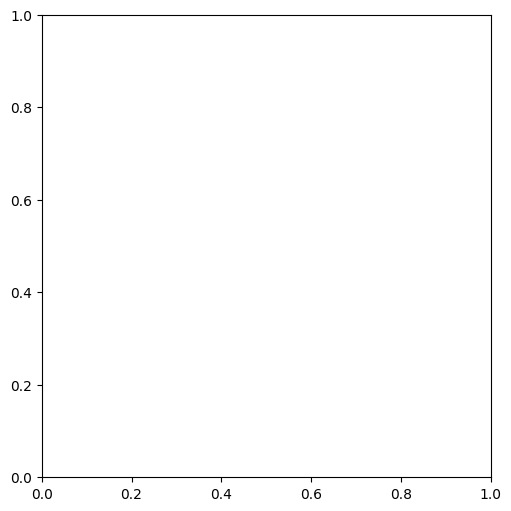

In [41]:
for ct in np.unique(pkhl.obs["com_nn50_VolnormExpr_data_annots"]):
    sq.pl.co_occurrence(pkhl, cluster_key="com_nn50_VolnormExpr_data_annots", clusters=ct)

In [42]:
np.unique(pkhl.obs["com_nn50_VolnormExpr_data_annots"])

array(['B cells, red pulp', 'Blood endothelial', 'CD4 Memory T cells',
       'CD8 Memory T cells', 'Fol B cells, ctr', 'Fol B cells, out',
       'Ki67 proliferating', 'Macrophages', 'Myeloid cells',
       'Neutrophils/Monocytes', 'Podoplanin', 'Sinusoidal cells',
       'indistinct'], dtype=object)

In [36]:
pkhl

AnnData object with n_obs × n_vars = 154446 × 28
    obs: 'C0', 'x', 'y', 'cellarea', 'com_nn50_VolnormExpr_data_annots'
    uns: 'com_nn50_VolnormExpr_data_annots_colors', 'com_nn50_VolnormExpr_data_annots_co_occurrence'
    obsm: 'spatial'

# Spatial Neighbors

In [43]:
sq.gr.spatial_neighbors(pkhl, delaunay=False, coord_type="generic", key_added="nn6") ## 6 by default
sq.gr.spatial_neighbors(pkhl, delaunay=True, coord_type="generic", key_added="delaunay")
sq.gr.spatial_neighbors(pkhl, delaunay=False, radius=30, coord_type="generic", key_added="r30")
sq.gr.spatial_neighbors(pkhl, delaunay=False, radius=50, coord_type="generic", key_added="r50")
sq.gr.spatial_neighbors(pkhl, delaunay=False, radius=100, coord_type="generic", key_added="r100")
sq.gr.spatial_neighbors(pkhl, delaunay=False, radius=200, coord_type="generic", key_added="r200")

## nn6

100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:15<00:00, 65.02/s]


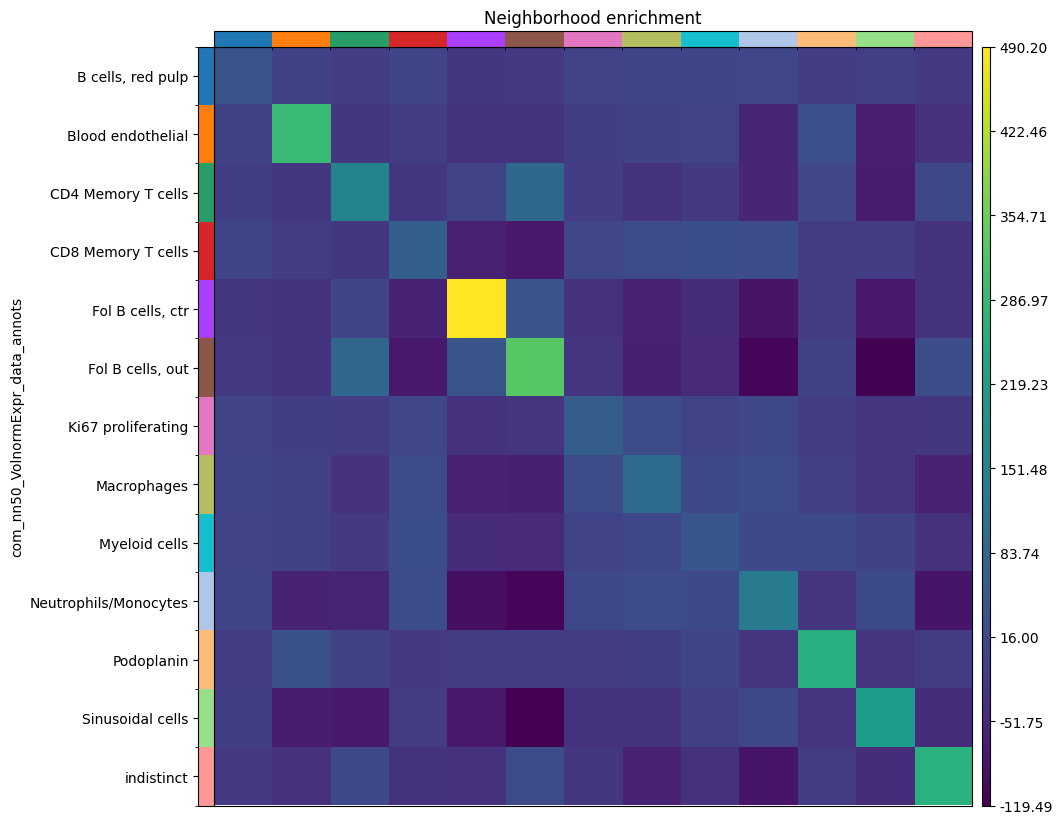

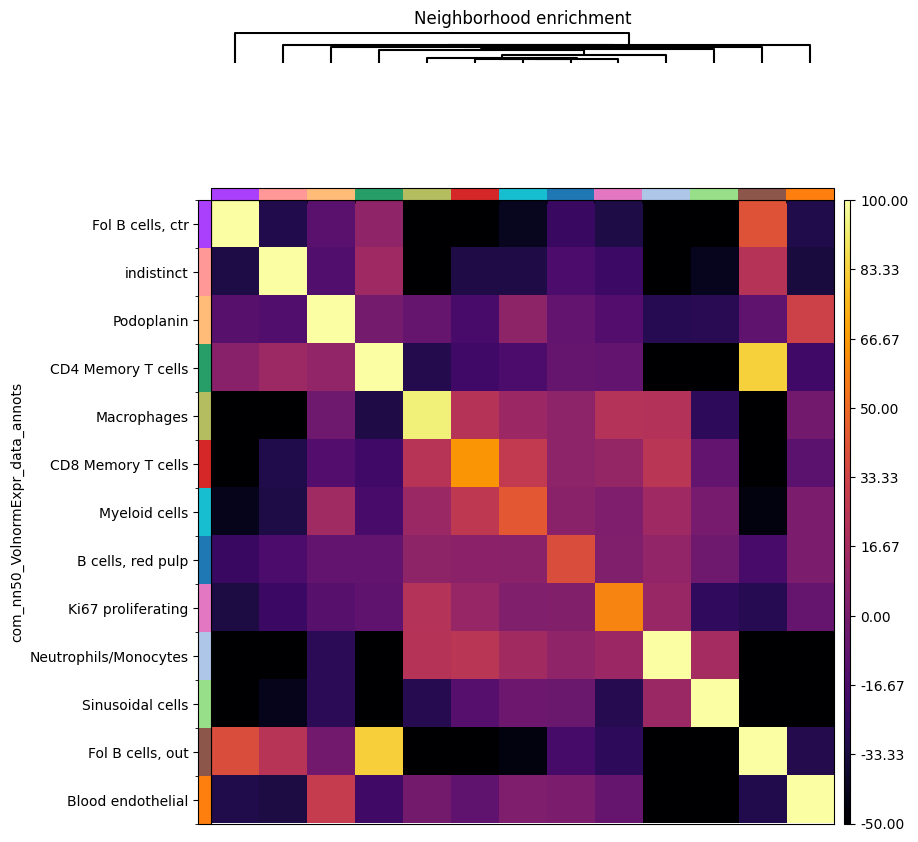

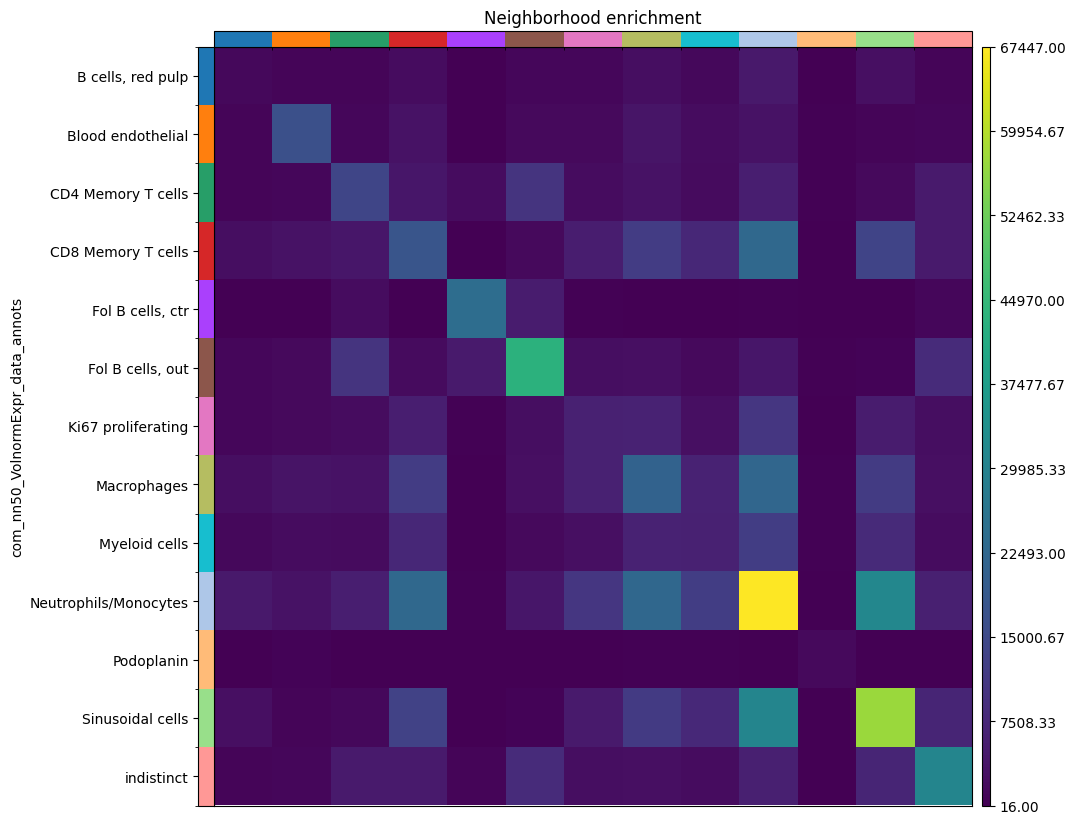

In [44]:
sq.gr.nhood_enrichment(pkhl, cluster_key="com_nn50_VolnormExpr_data_annots", connectivity_key="nn6")
sq.pl.nhood_enrichment(pkhl, cluster_key="com_nn50_VolnormExpr_data_annots", mode="zscore")
sq.pl.nhood_enrichment(pkhl, cluster_key="com_nn50_VolnormExpr_data_annots", mode="zscore", method="single", cmap="inferno", vmin=-50, vmax=100)
sq.pl.nhood_enrichment(pkhl, cluster_key="com_nn50_VolnormExpr_data_annots", mode="count")

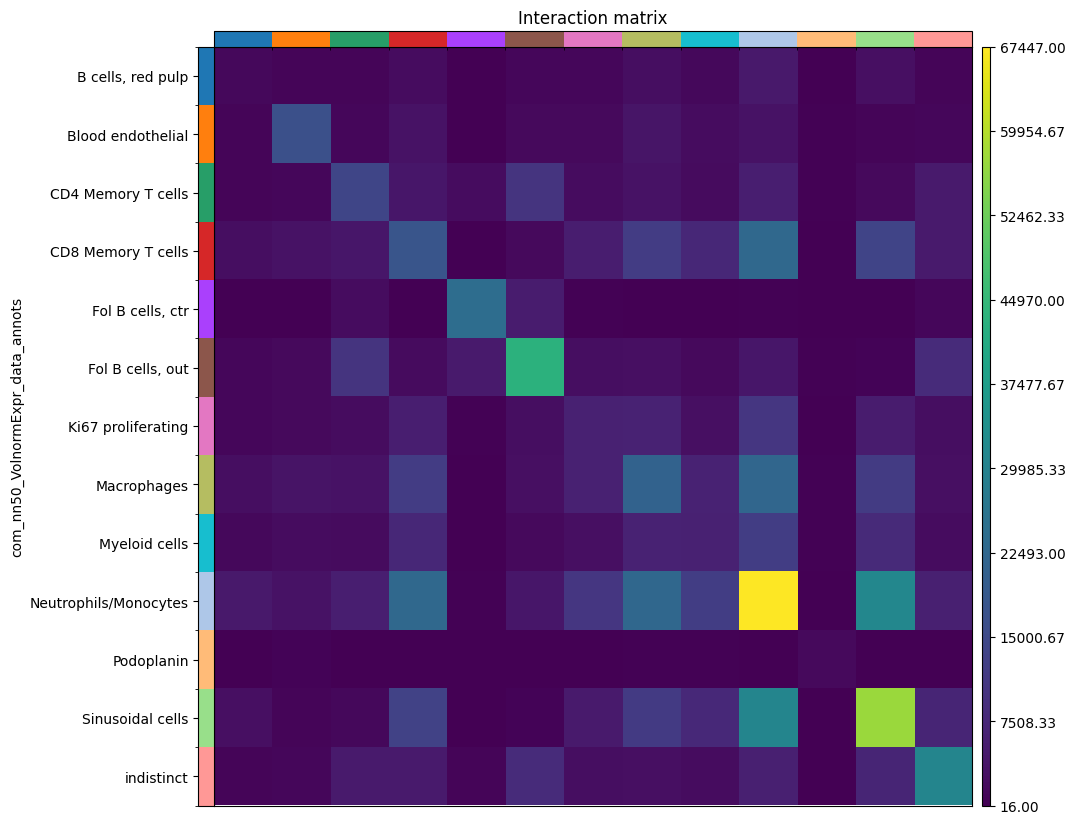

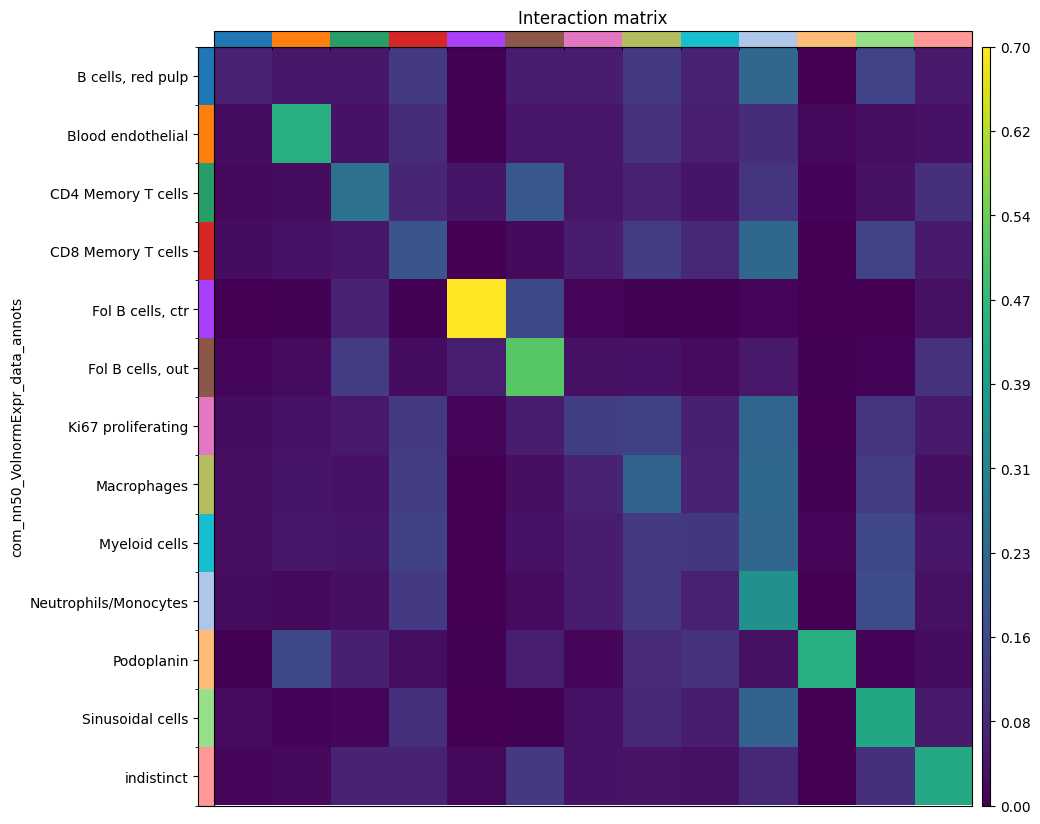

In [45]:
sq.gr.interaction_matrix(pkhl, cluster_key="com_nn50_VolnormExpr_data_annots", connectivity_key="nn6")
sq.pl.interaction_matrix(pkhl, cluster_key="com_nn50_VolnormExpr_data_annots")
sq.gr.interaction_matrix(pkhl, cluster_key="com_nn50_VolnormExpr_data_annots", connectivity_key="nn6", normalized=True)
sq.pl.interaction_matrix(pkhl, cluster_key="com_nn50_VolnormExpr_data_annots")

## delaunay

100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:13<00:00, 74.71/s]


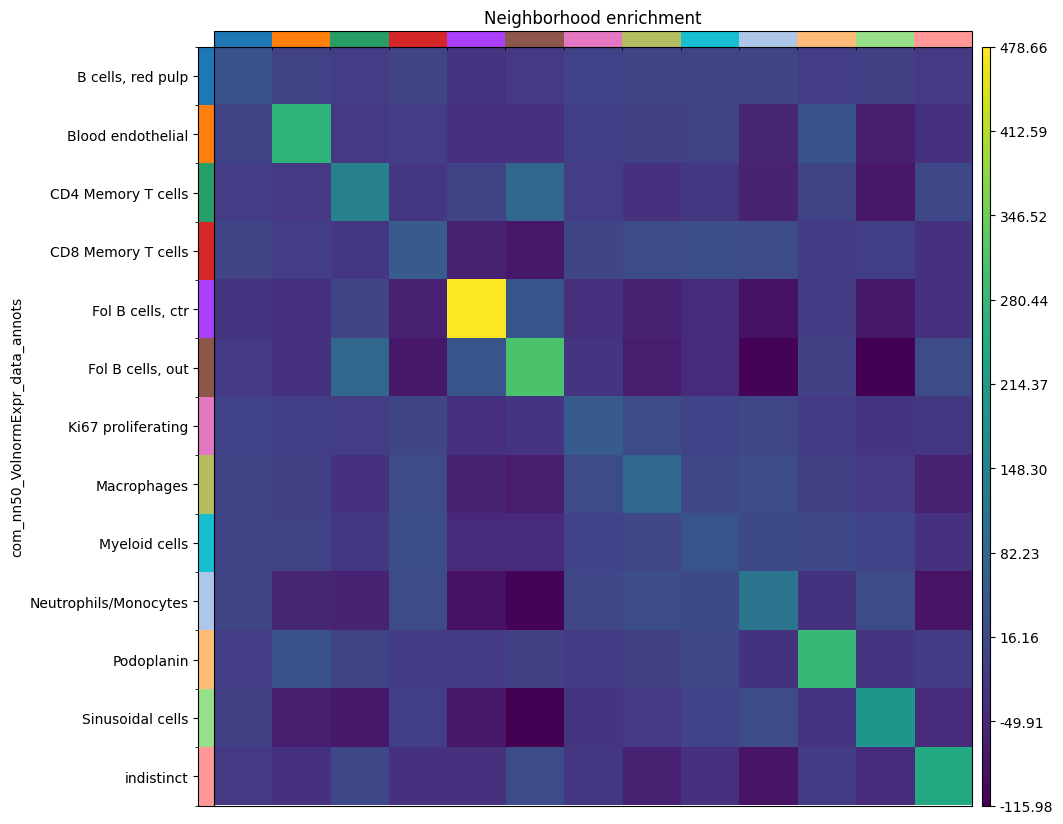

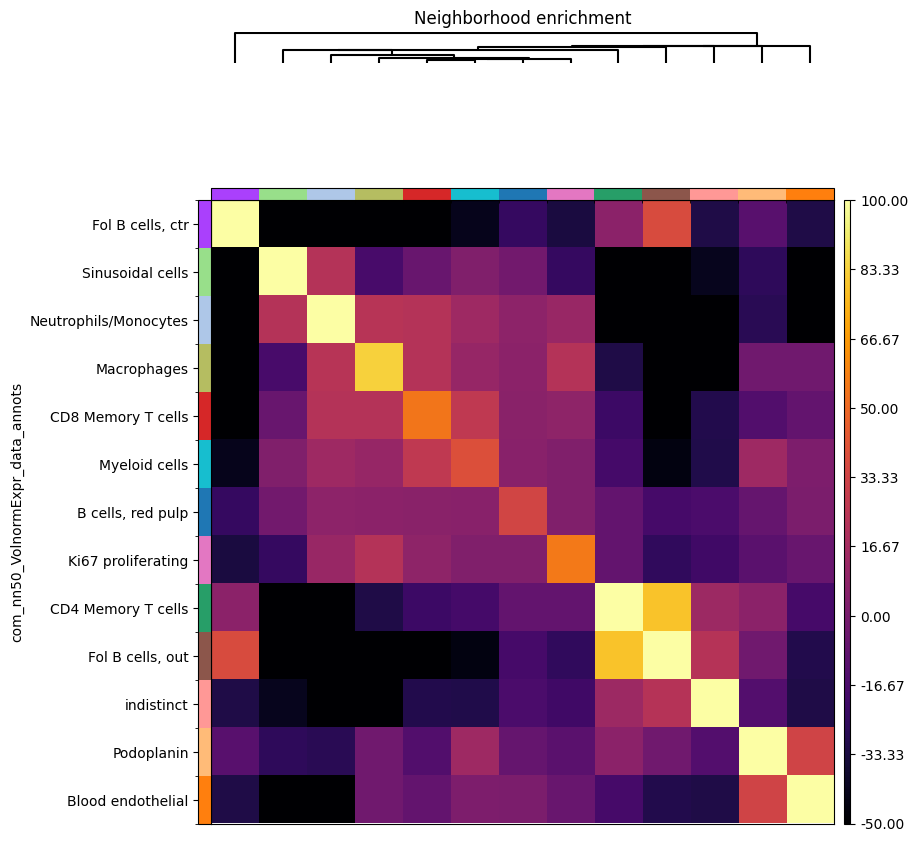

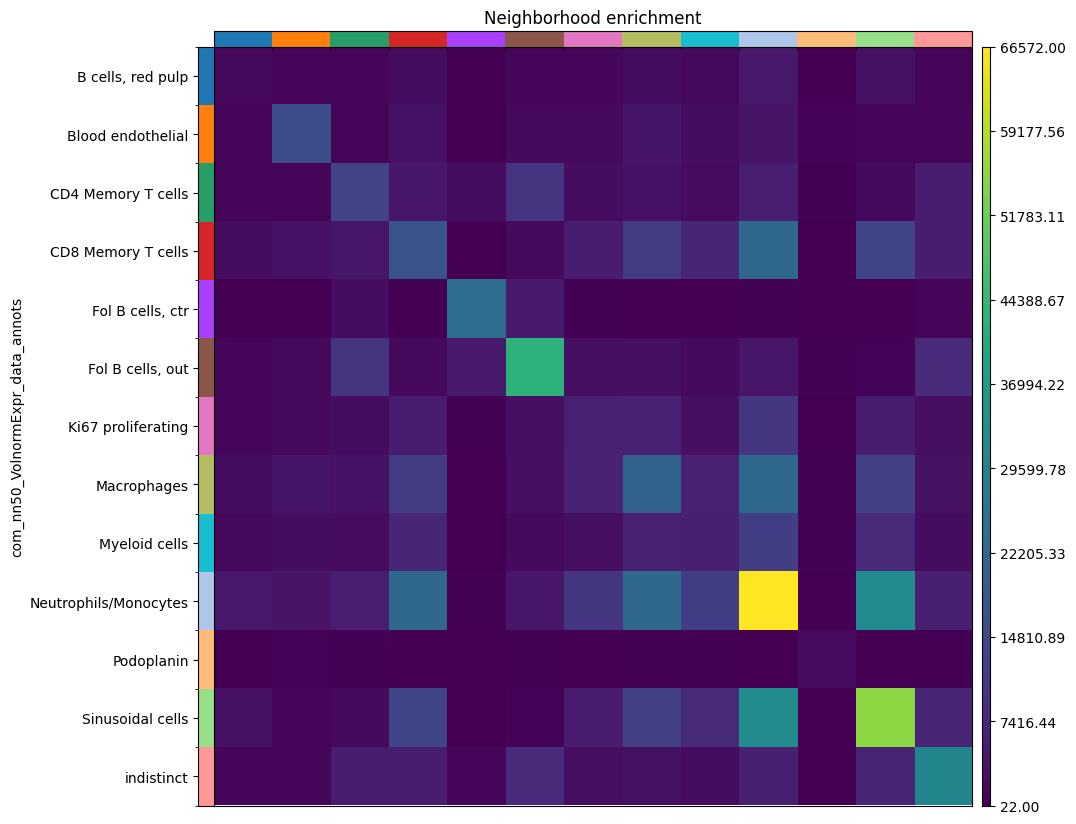

In [46]:
sq.gr.nhood_enrichment(pkhl, cluster_key="com_nn50_VolnormExpr_data_annots", connectivity_key="delaunay")
sq.pl.nhood_enrichment(pkhl, cluster_key="com_nn50_VolnormExpr_data_annots", mode="zscore")
sq.pl.nhood_enrichment(pkhl, cluster_key="com_nn50_VolnormExpr_data_annots", mode="zscore", method="single", cmap="inferno", vmin=-50, vmax=100)
sq.pl.nhood_enrichment(pkhl, cluster_key="com_nn50_VolnormExpr_data_annots", mode="count")

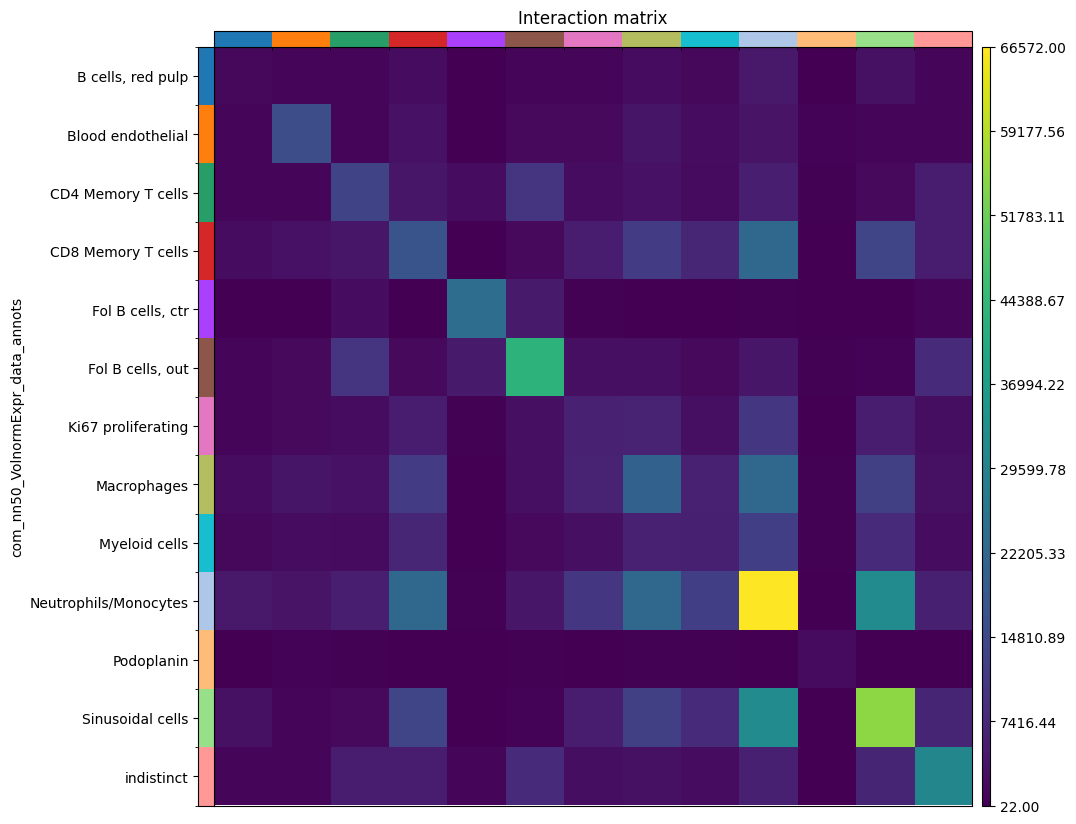

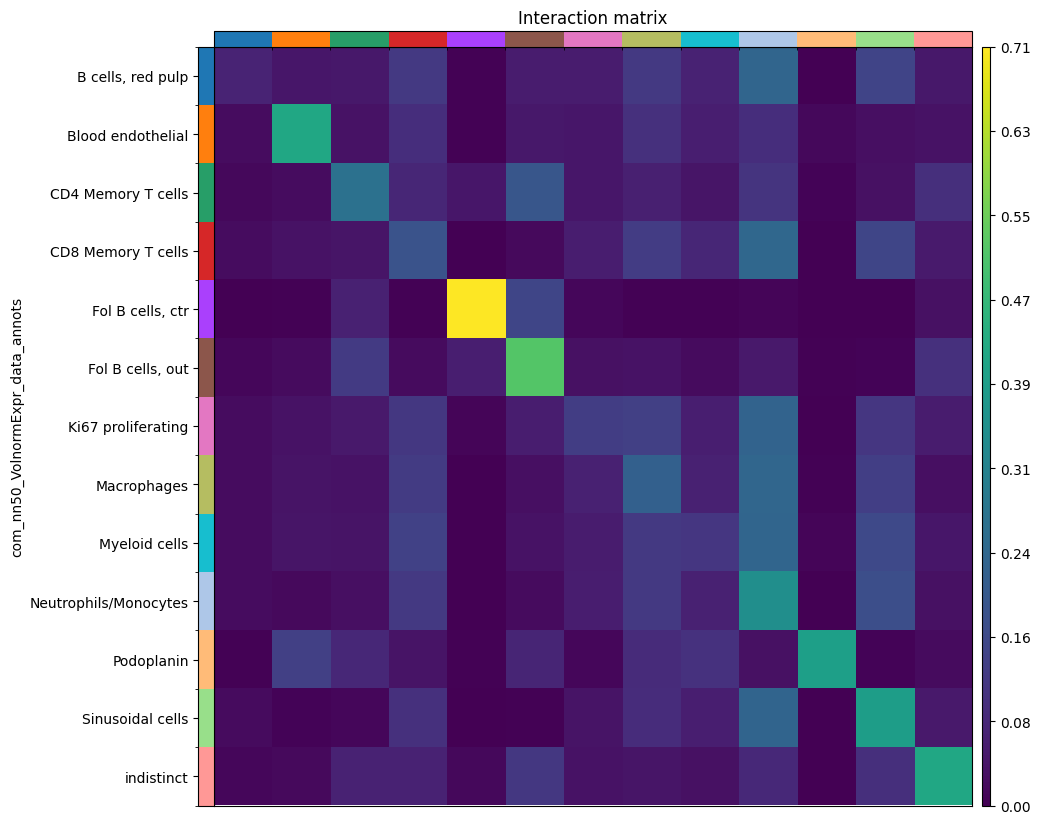

In [47]:
sq.gr.interaction_matrix(pkhl, cluster_key="com_nn50_VolnormExpr_data_annots", connectivity_key="delaunay")
sq.pl.interaction_matrix(pkhl, cluster_key="com_nn50_VolnormExpr_data_annots")
sq.gr.interaction_matrix(pkhl, cluster_key="com_nn50_VolnormExpr_data_annots", connectivity_key="delaunay", normalized=True)
sq.pl.interaction_matrix(pkhl, cluster_key="com_nn50_VolnormExpr_data_annots")

## r30

100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:13<00:00, 72.84/s]


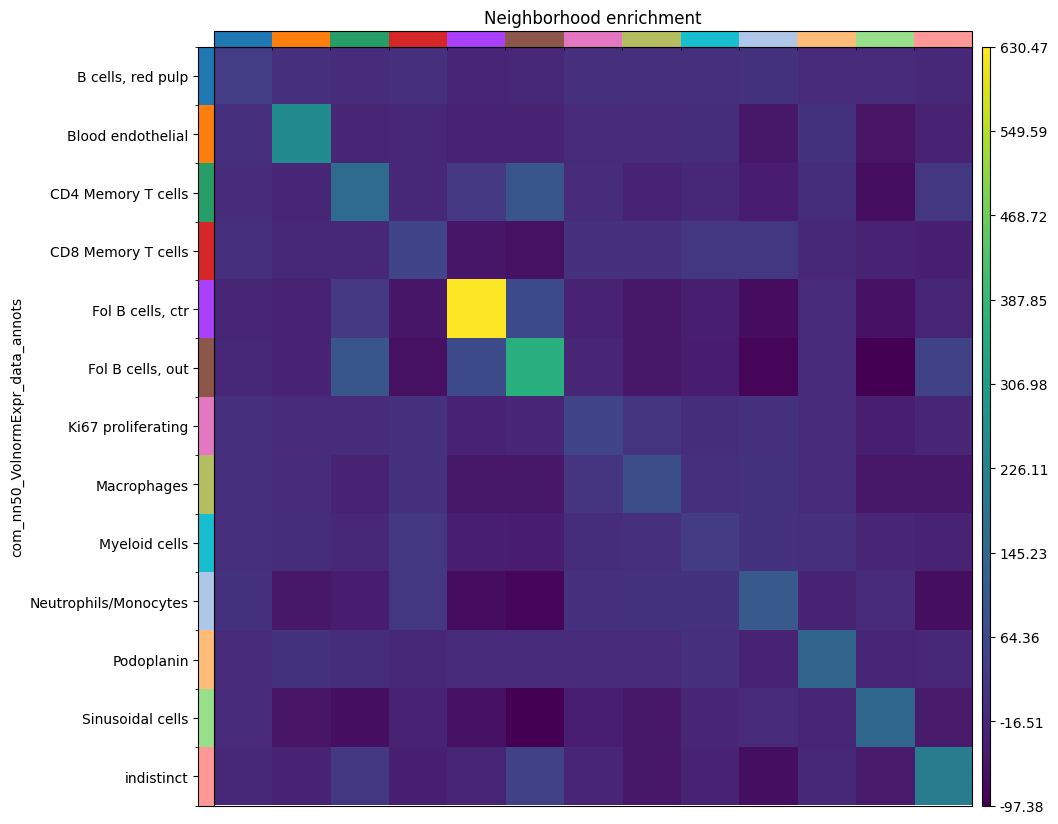

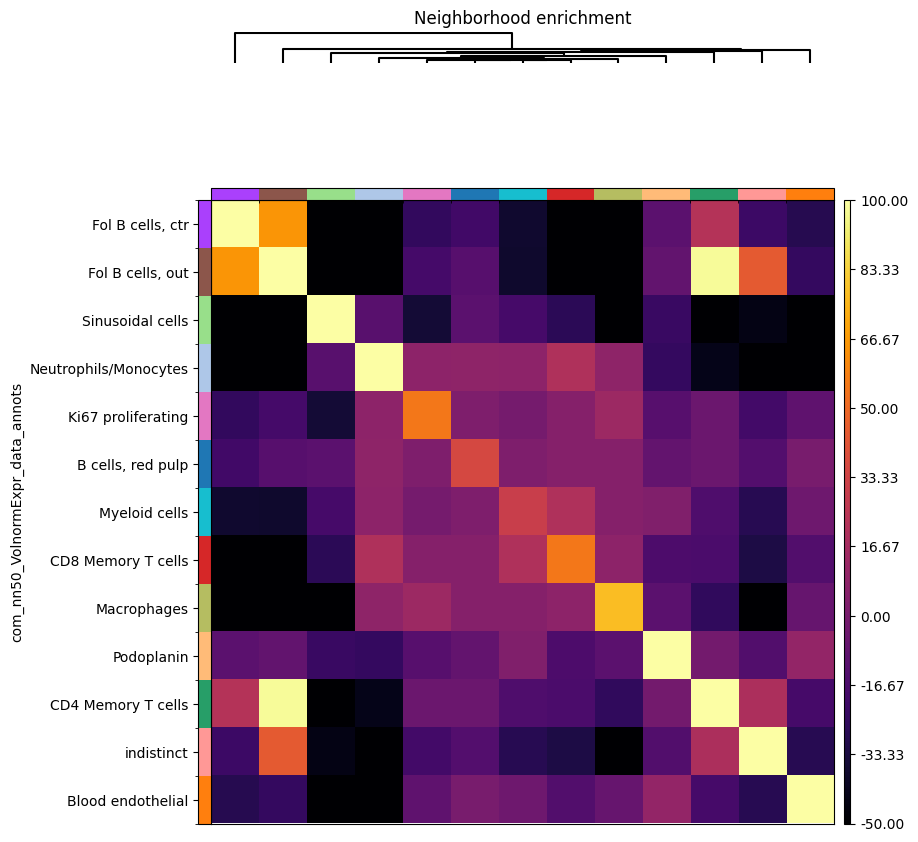

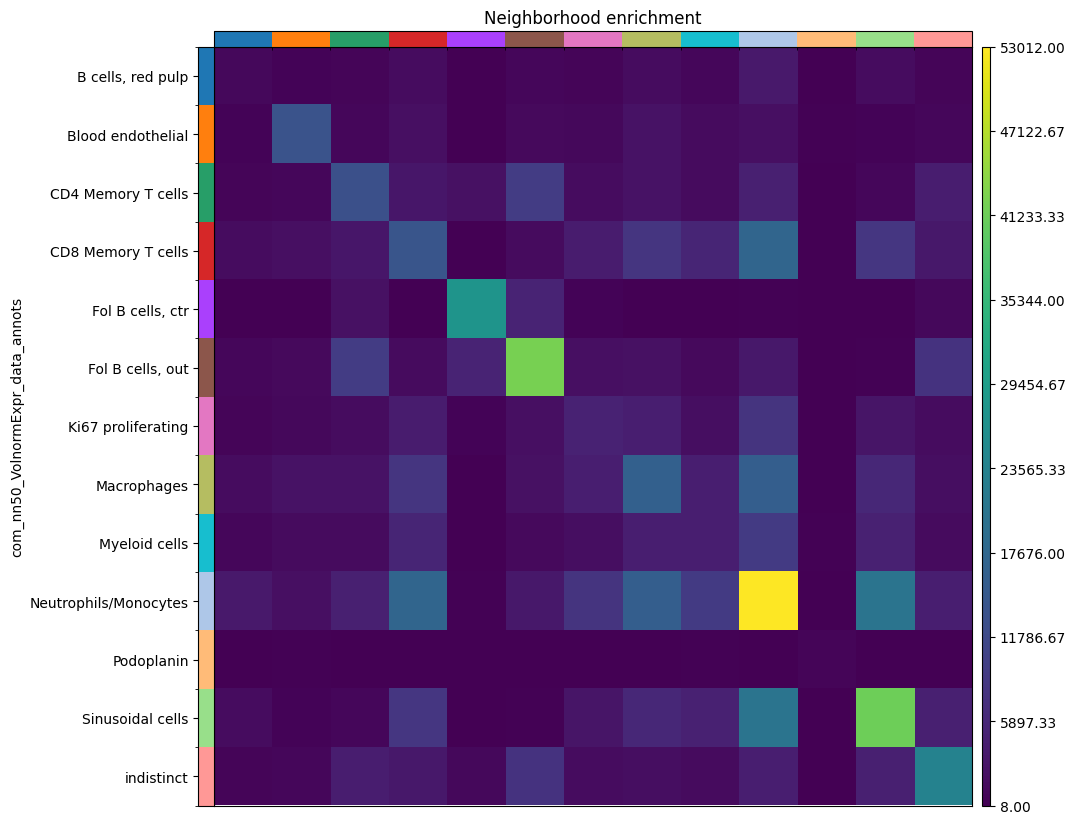

In [48]:
sq.gr.nhood_enrichment(pkhl, cluster_key="com_nn50_VolnormExpr_data_annots", connectivity_key="r30")
sq.pl.nhood_enrichment(pkhl, cluster_key="com_nn50_VolnormExpr_data_annots", mode="zscore")
sq.pl.nhood_enrichment(pkhl, cluster_key="com_nn50_VolnormExpr_data_annots", mode="zscore", method="single", cmap="inferno", vmin=-50, vmax=100)
sq.pl.nhood_enrichment(pkhl, cluster_key="com_nn50_VolnormExpr_data_annots", mode="count")

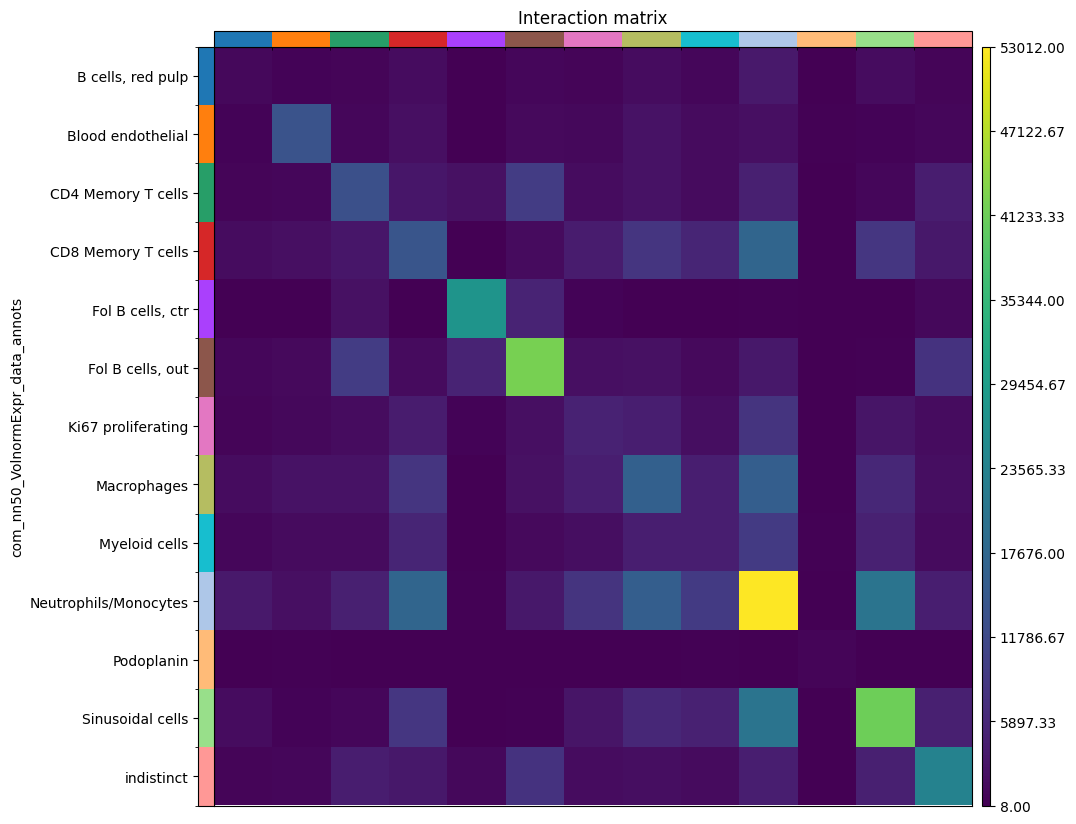

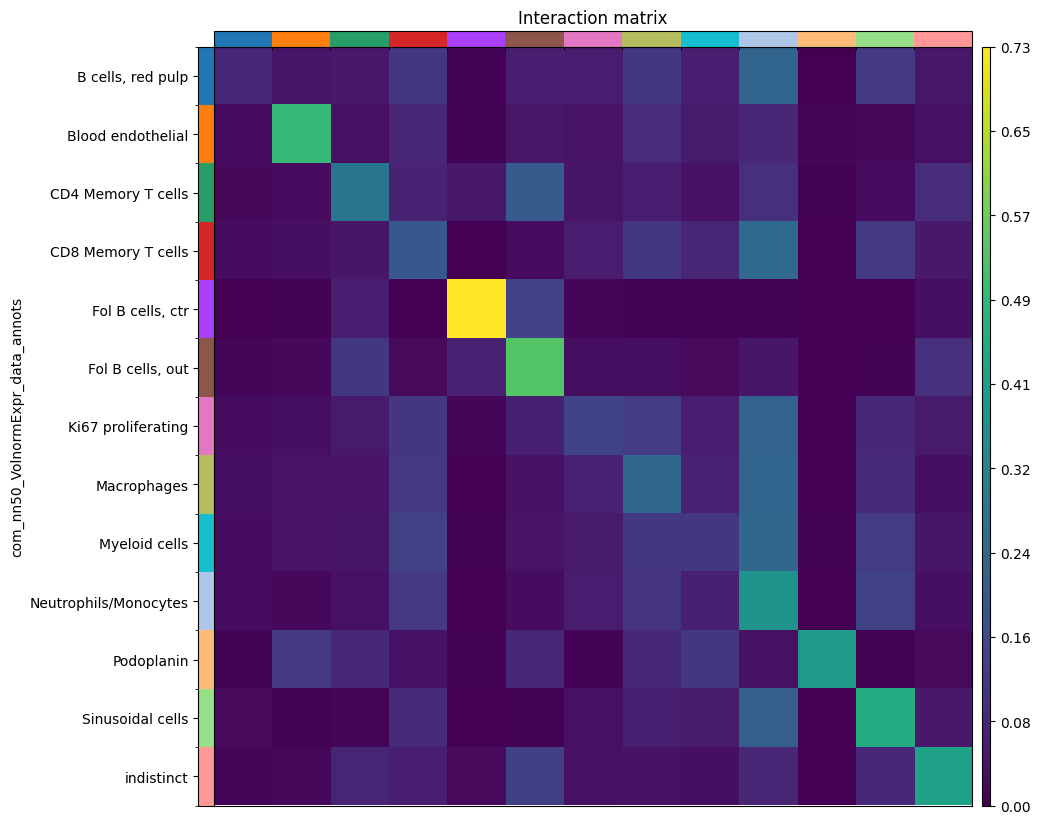

In [49]:
sq.gr.interaction_matrix(pkhl, cluster_key="com_nn50_VolnormExpr_data_annots", connectivity_key="r30")
sq.pl.interaction_matrix(pkhl, cluster_key="com_nn50_VolnormExpr_data_annots")
sq.gr.interaction_matrix(pkhl, cluster_key="com_nn50_VolnormExpr_data_annots", connectivity_key="r30", normalized=True)
sq.pl.interaction_matrix(pkhl, cluster_key="com_nn50_VolnormExpr_data_annots")

## r50

100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:15<00:00, 66.11/s]


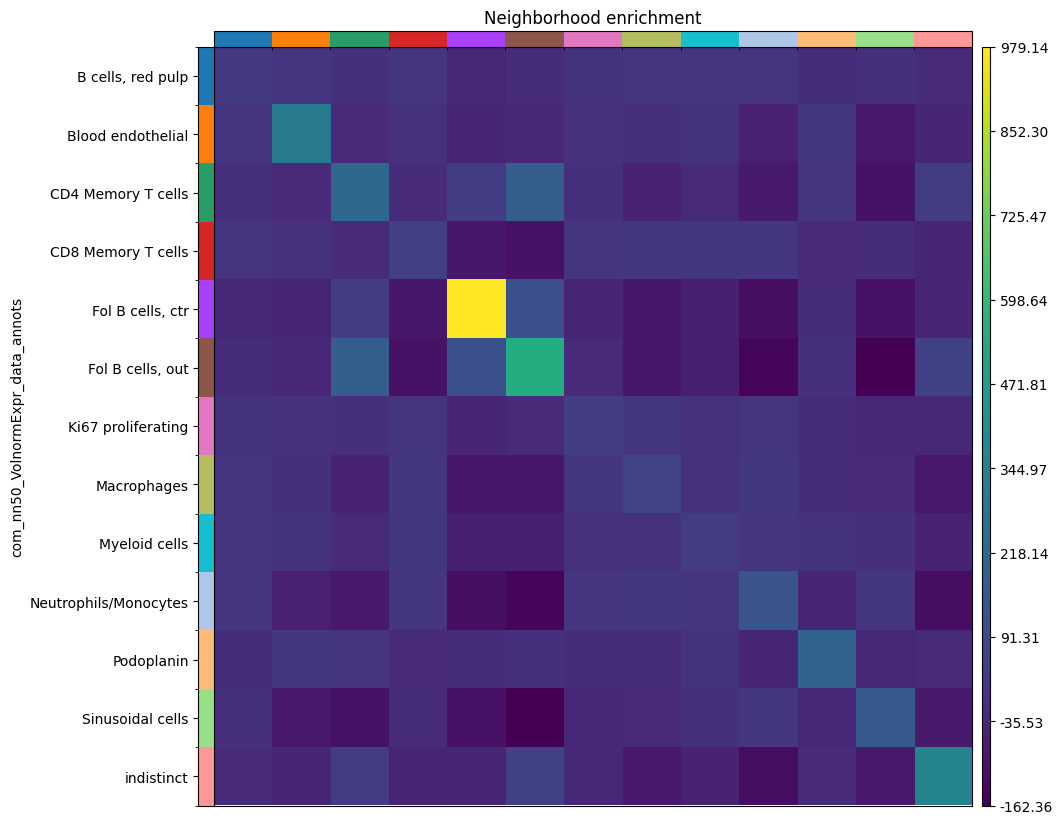

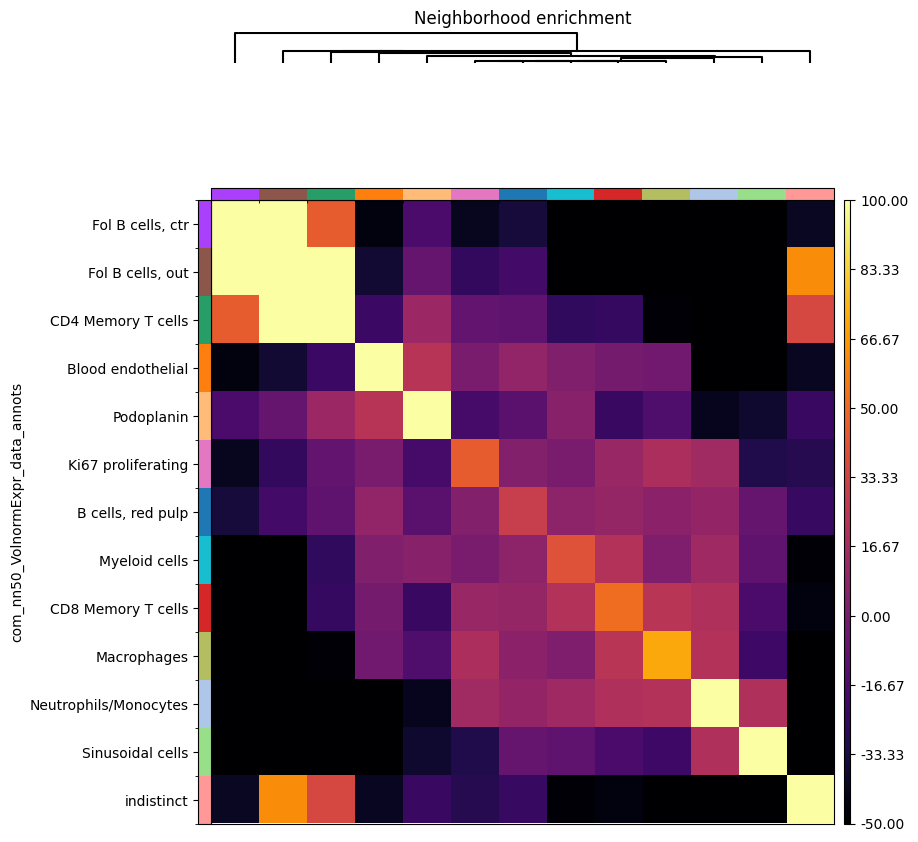

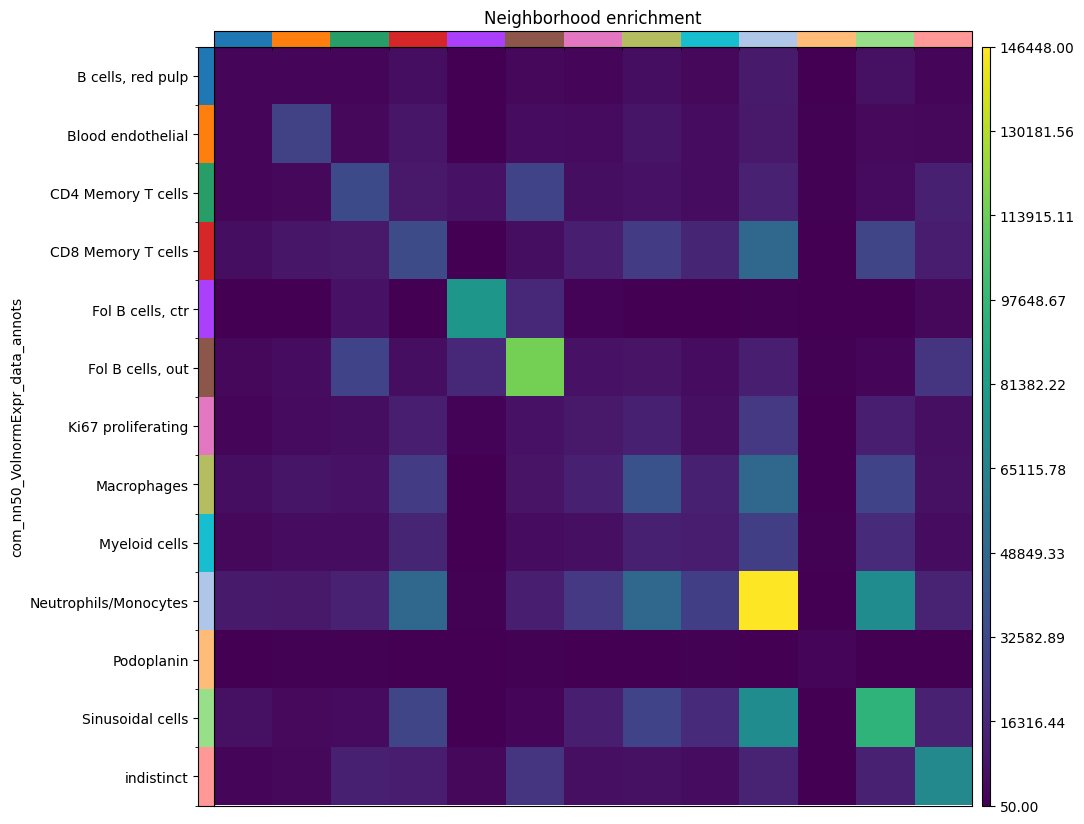

In [50]:
sq.gr.nhood_enrichment(pkhl, cluster_key="com_nn50_VolnormExpr_data_annots", connectivity_key="r50")
sq.pl.nhood_enrichment(pkhl, cluster_key="com_nn50_VolnormExpr_data_annots", mode="zscore")
sq.pl.nhood_enrichment(pkhl, cluster_key="com_nn50_VolnormExpr_data_annots", mode="zscore", method="single", cmap="inferno", vmin=-50, vmax=100)
sq.pl.nhood_enrichment(pkhl, cluster_key="com_nn50_VolnormExpr_data_annots", mode="count")

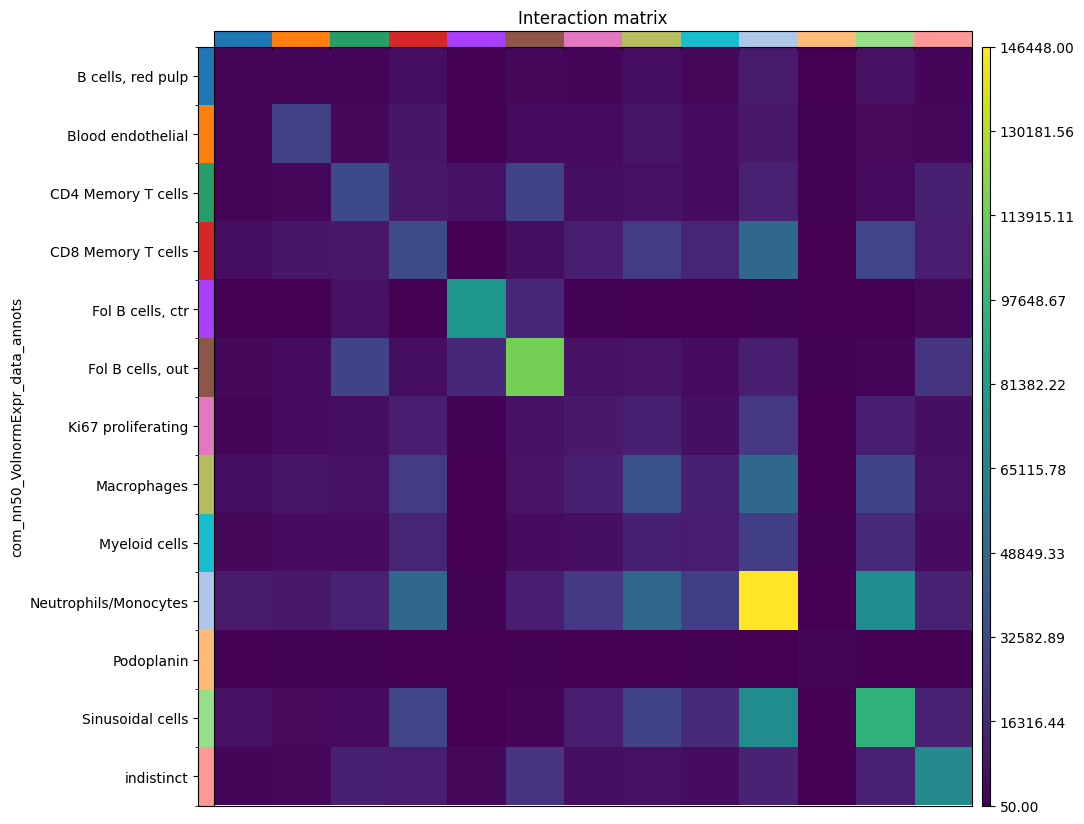

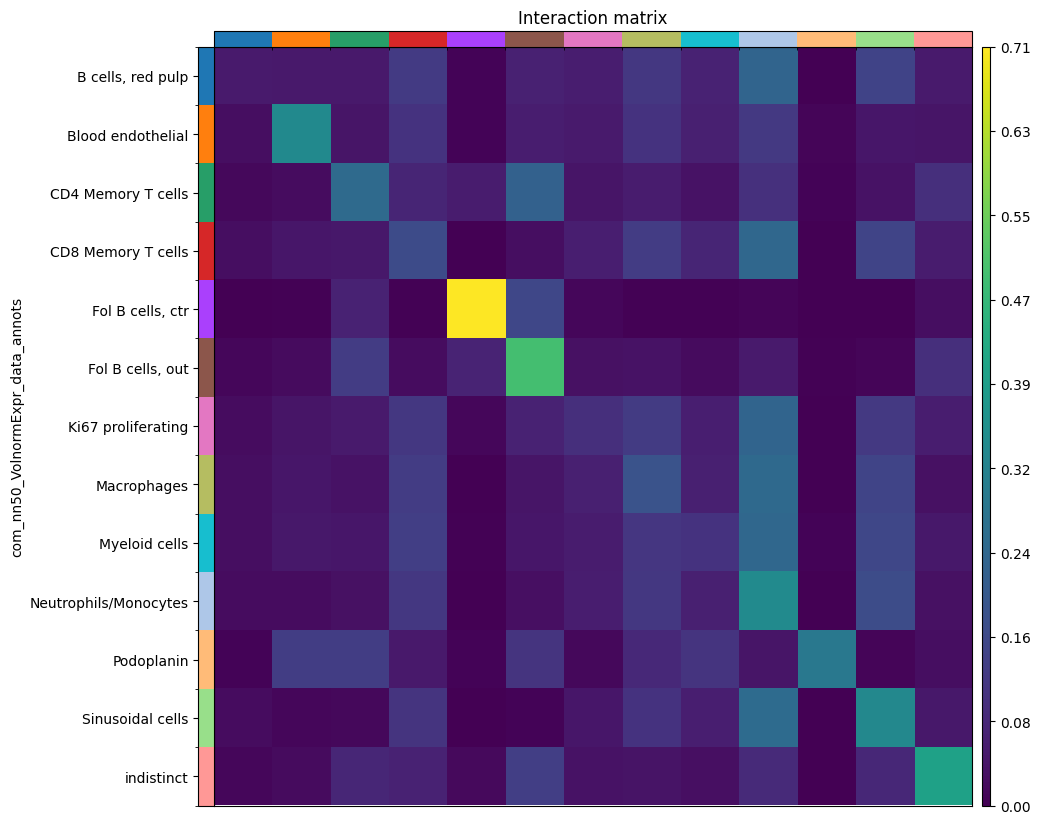

In [51]:
sq.gr.interaction_matrix(pkhl, cluster_key="com_nn50_VolnormExpr_data_annots", connectivity_key="r50")
sq.pl.interaction_matrix(pkhl, cluster_key="com_nn50_VolnormExpr_data_annots")
sq.gr.interaction_matrix(pkhl, cluster_key="com_nn50_VolnormExpr_data_annots", connectivity_key="r50", normalized=True)
sq.pl.interaction_matrix(pkhl, cluster_key="com_nn50_VolnormExpr_data_annots")

## r100

100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:20<00:00, 49.03/s]


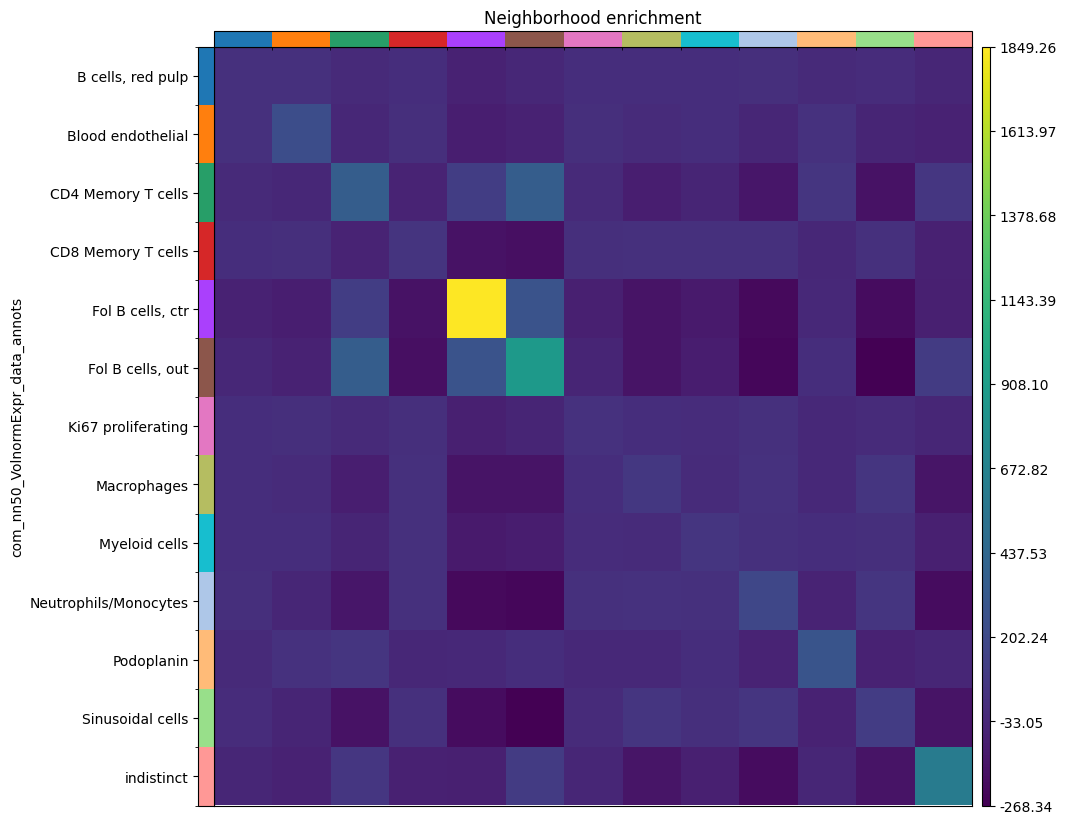

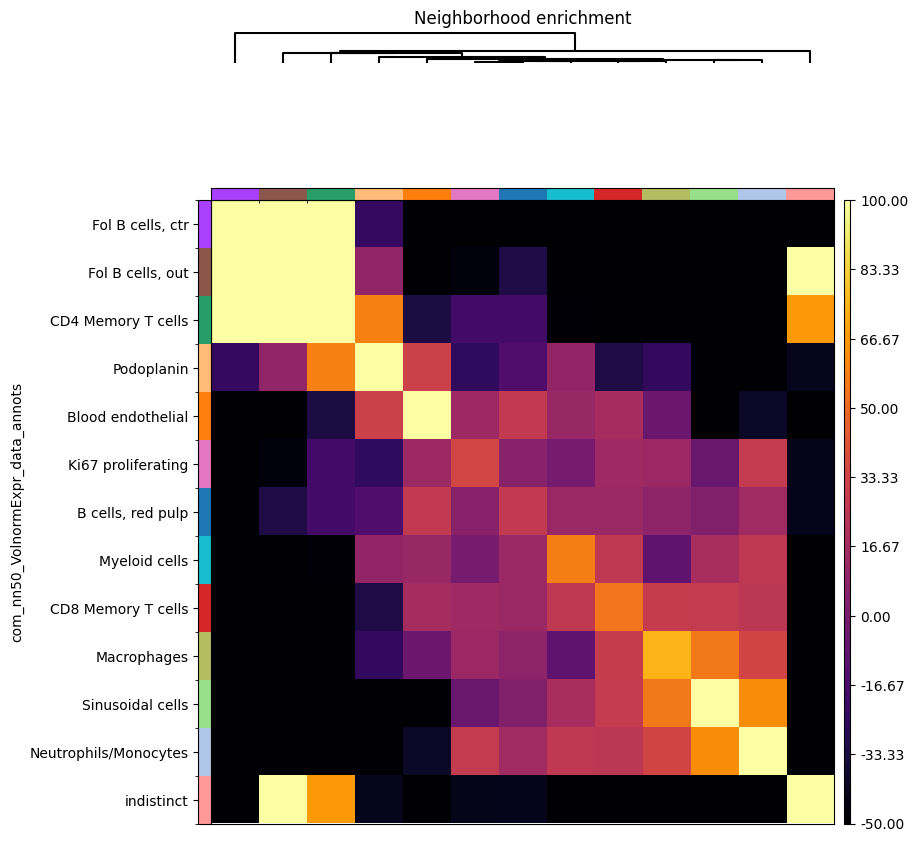

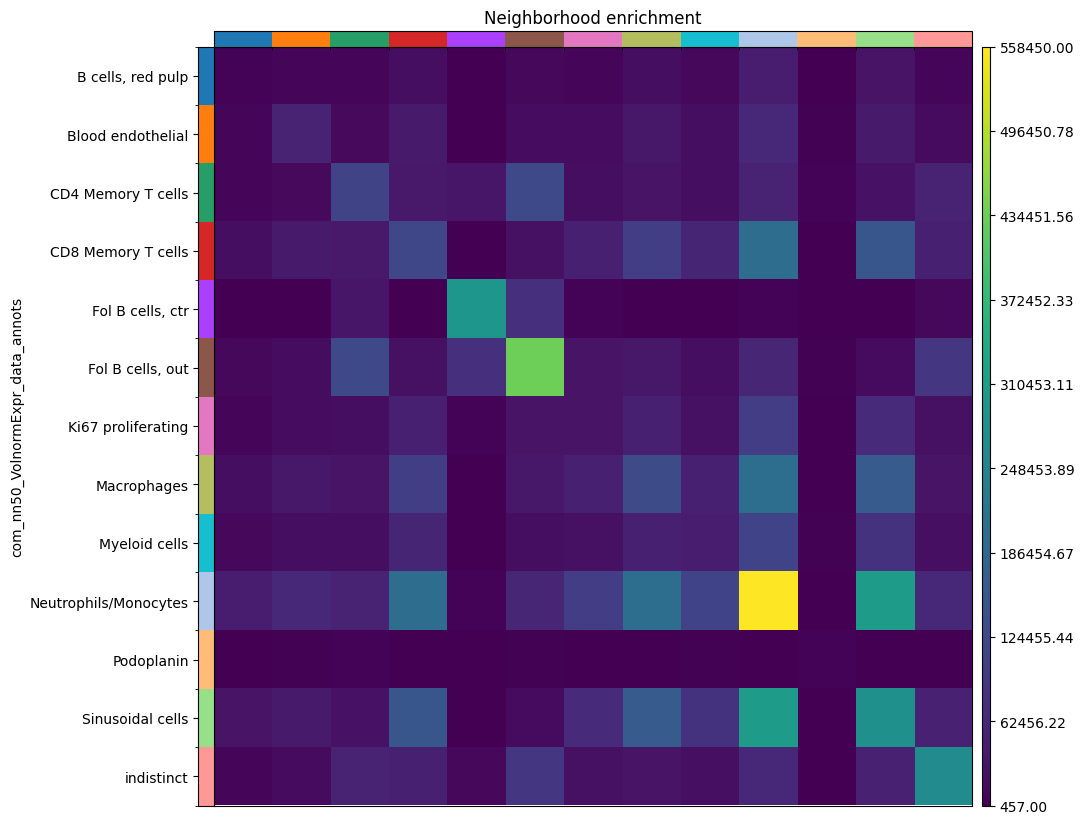

In [52]:
sq.gr.nhood_enrichment(pkhl, cluster_key="com_nn50_VolnormExpr_data_annots", connectivity_key="r100")
sq.pl.nhood_enrichment(pkhl, cluster_key="com_nn50_VolnormExpr_data_annots", mode="zscore")
sq.pl.nhood_enrichment(pkhl, cluster_key="com_nn50_VolnormExpr_data_annots", mode="zscore", method="single", cmap="inferno", vmin=-50, vmax=100)
sq.pl.nhood_enrichment(pkhl, cluster_key="com_nn50_VolnormExpr_data_annots", mode="count")

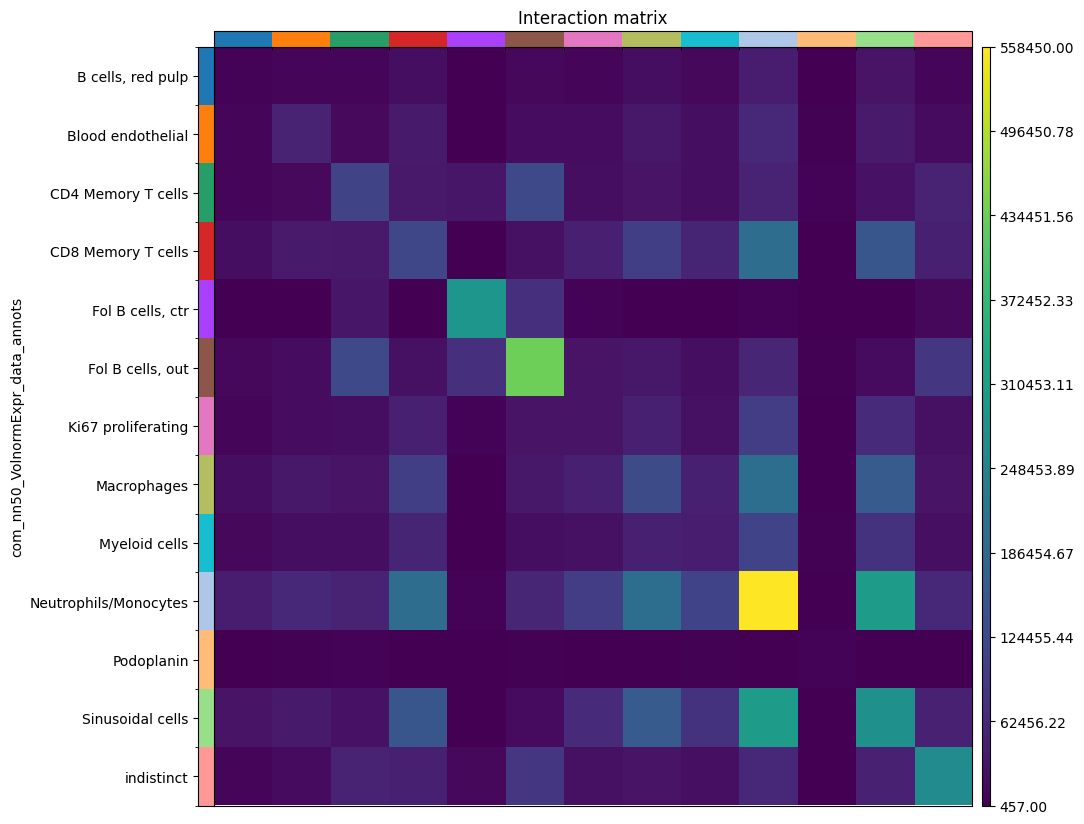

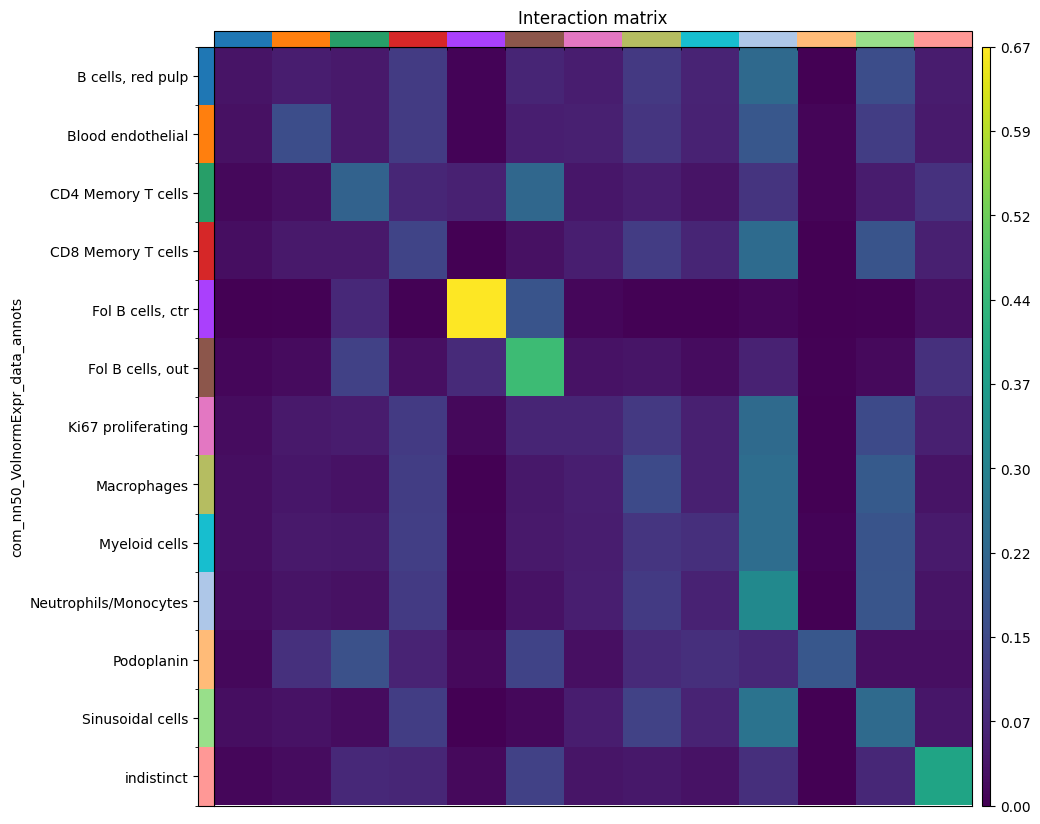

In [53]:
sq.gr.interaction_matrix(pkhl, cluster_key="com_nn50_VolnormExpr_data_annots", connectivity_key="r100")
sq.pl.interaction_matrix(pkhl, cluster_key="com_nn50_VolnormExpr_data_annots")
sq.gr.interaction_matrix(pkhl, cluster_key="com_nn50_VolnormExpr_data_annots", connectivity_key="r100", normalized=True)
sq.pl.interaction_matrix(pkhl, cluster_key="com_nn50_VolnormExpr_data_annots")

## r200

100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:41<00:00, 24.30/s]


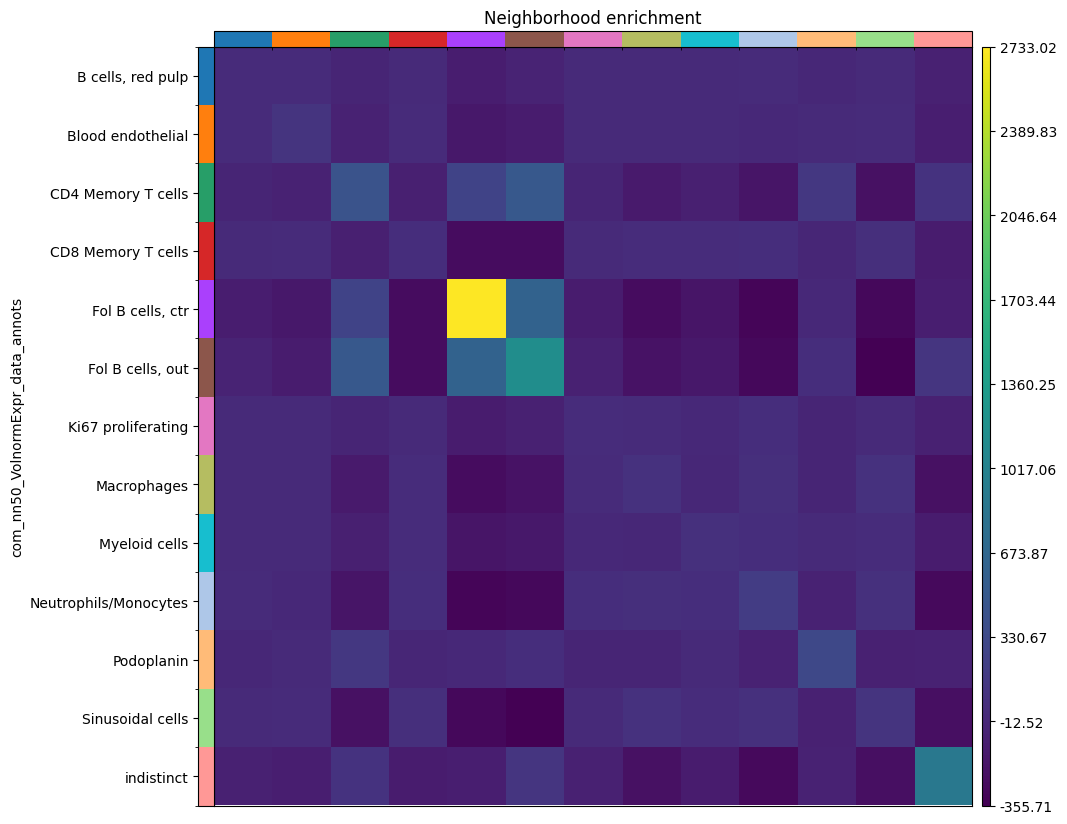

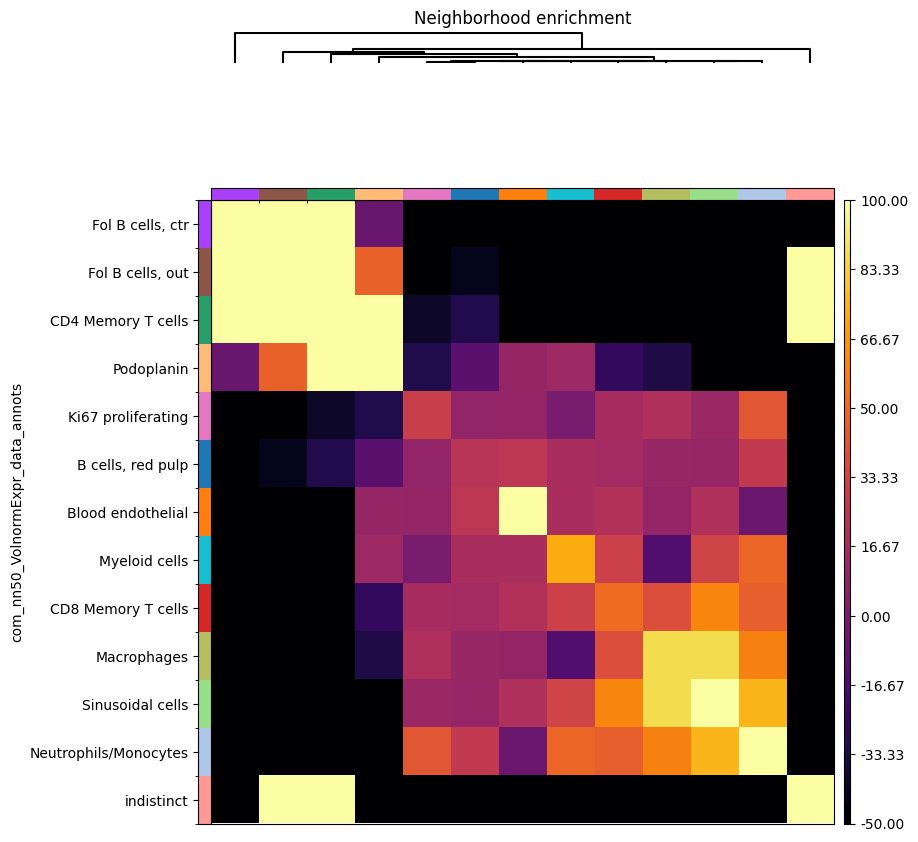

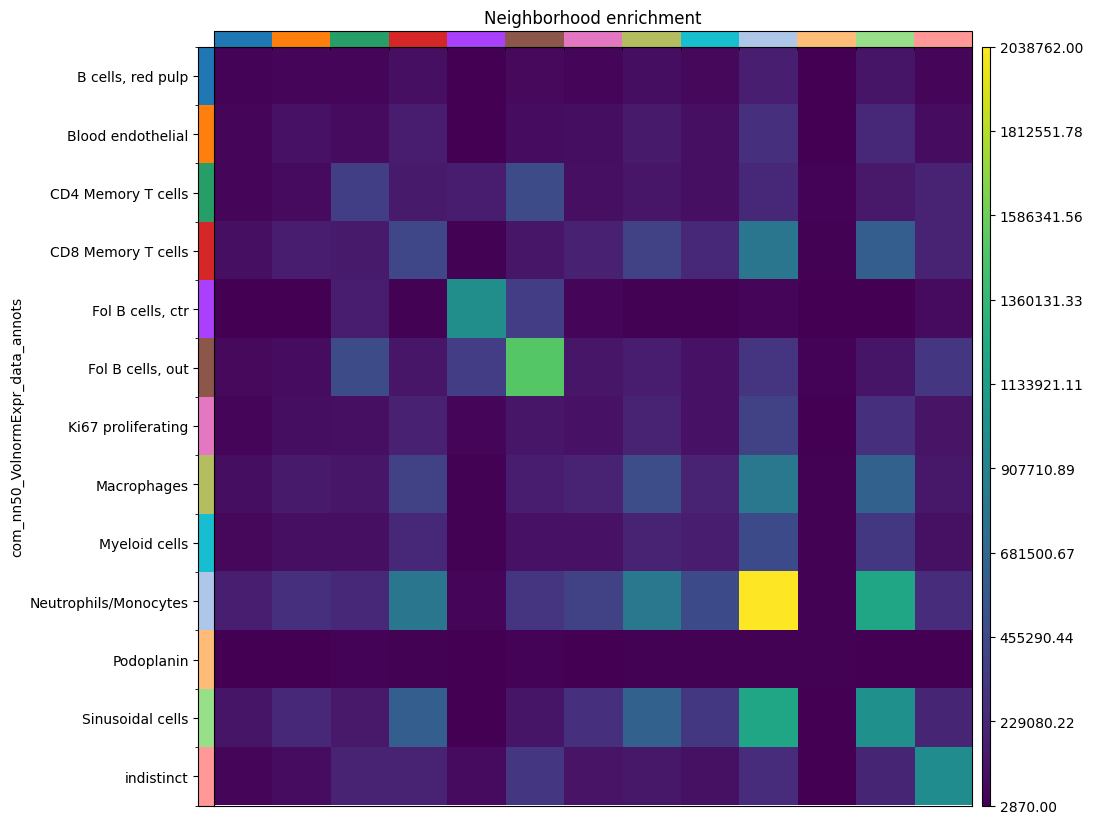

In [54]:
sq.gr.nhood_enrichment(pkhl, cluster_key="com_nn50_VolnormExpr_data_annots", connectivity_key="r200")
sq.pl.nhood_enrichment(pkhl, cluster_key="com_nn50_VolnormExpr_data_annots", mode="zscore")
sq.pl.nhood_enrichment(pkhl, cluster_key="com_nn50_VolnormExpr_data_annots", mode="zscore", method="single", cmap="inferno", vmin=-50, vmax=100)
sq.pl.nhood_enrichment(pkhl, cluster_key="com_nn50_VolnormExpr_data_annots", mode="count")

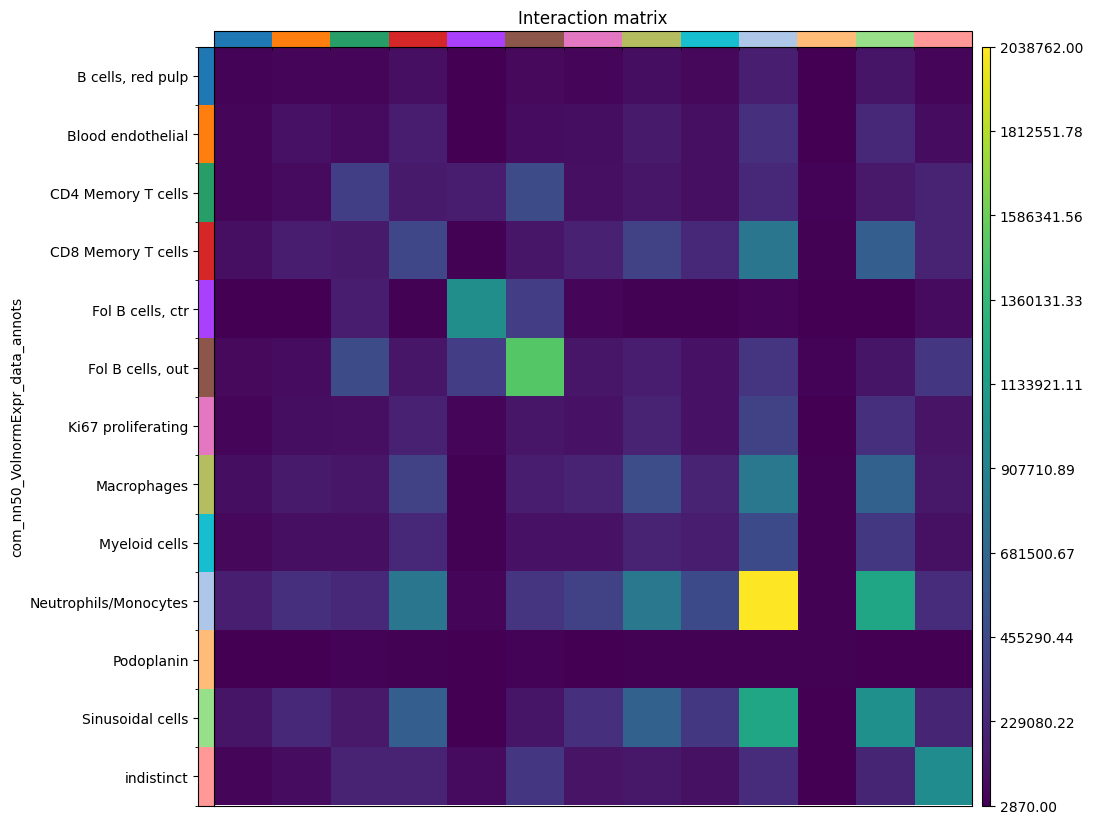

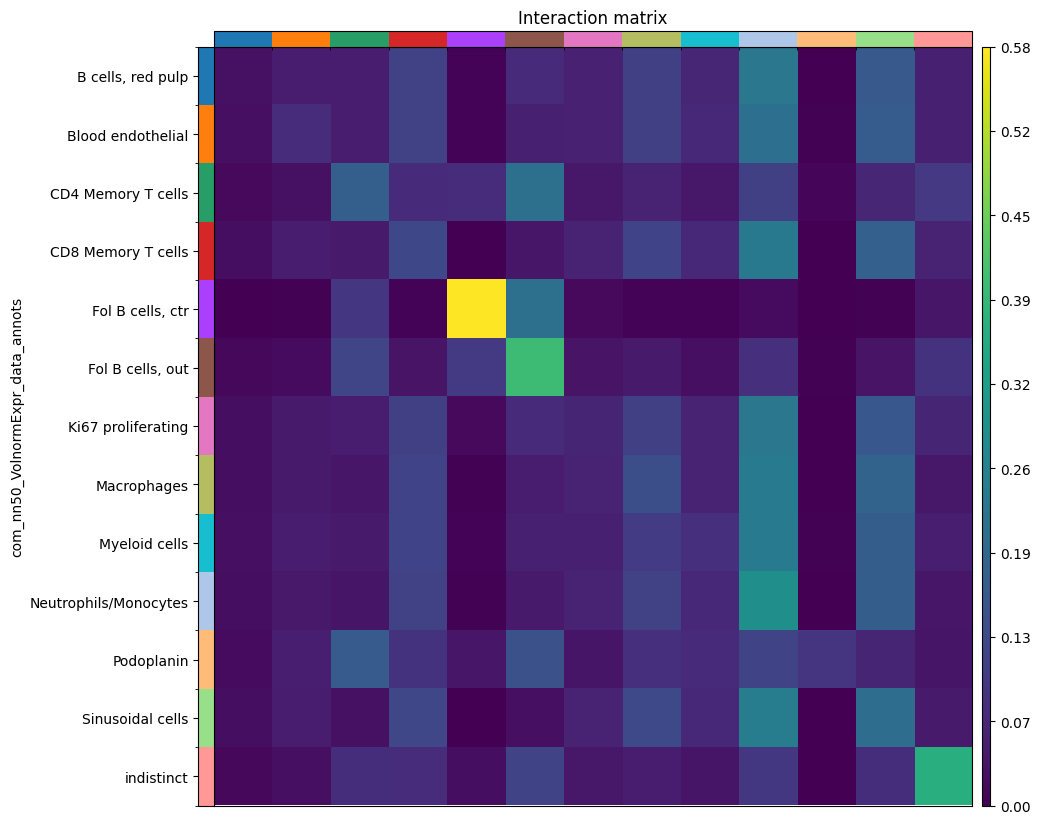

In [55]:
sq.gr.interaction_matrix(pkhl, cluster_key="com_nn50_VolnormExpr_data_annots", connectivity_key="r200")
sq.pl.interaction_matrix(pkhl, cluster_key="com_nn50_VolnormExpr_data_annots")
sq.gr.interaction_matrix(pkhl, cluster_key="com_nn50_VolnormExpr_data_annots", connectivity_key="r200", normalized=True)
sq.pl.interaction_matrix(pkhl, cluster_key="com_nn50_VolnormExpr_data_annots")

# 2nd try

In [316]:
pkhl_2 = pd.read_csv("/Users/brendan/Desktop/PostDoc/work/HuBMAP/repos/multiscale_celltype_colocalization_analysis/data/sim/pkhl_test.meta.csv",
                       index_col=0)

pkhl_2

x     y                cluster
1          0    32       Sinusoidal cells
2          0    78          Myeloid cells
3         13     4          Myeloid cells
4          7    58       Sinusoidal cells
5          0   129  Neutrophils/Monocytes
...      ...   ...                    ...
154442  9399  9052  Neutrophils/Monocytes
154443  9385  8740       Sinusoidal cells
154444  9407  8722  Neutrophils/Monocytes
154445  9385  8962       Sinusoidal cells
154446  9385  9071     CD4 Memory T cells

[154446 rows x 3 columns]

In [317]:
pkhl_2["x"] = pkhl_2["x"] / 10.0
pkhl_2["y"] = pkhl_2["y"] / 10.0

In [318]:
pkhl_2['cluster'] = pkhl_2['cluster'].astype("category") # like levels in R, need for squidpy stuff
pkhl_2['cluster']

1              Sinusoidal cells
2                 Myeloid cells
3                 Myeloid cells
4              Sinusoidal cells
5         Neutrophils/Monocytes
                  ...          
154442    Neutrophils/Monocytes
154443         Sinusoidal cells
154444    Neutrophils/Monocytes
154445         Sinusoidal cells
154446       CD4 Memory T cells
Name: cluster, Length: 154446, dtype: category
Categories (13, object): ['B cells, red pulp', 'Blood endothelial', 'CD4 Memory T cells', 'CD8 Memory T cells', ..., 'Neutrophils/Monocytes', 'Podoplanin', 'Sinusoidal cells', 'indistinct']

In [319]:
# just some random data cause I'm just interested in getting the coordinates and labels in there
counts = rng.integers(0, 15, size=(154446, 50))
counts.shape

(154446, 50)

In [320]:
pkhl_2_ann = AnnData(counts, obsm={"spatial": np.array(pkhl_2[["x", "y"]], dtype=float)})

/var/folders/cf/llylf0sn67j0qlvgy3_990ym0000gn/T/ipykernel_88159/2389234203.py:1: FutureWarning: X.dtype being converted to np.float32 from int64. In the next version of anndata (0.9) conversion will not be automatic. Pass dtype explicitly to avoid this warning. Pass `AnnData(X, dtype=X.dtype, ...)` to get the future behavour.
  pkhl_2_ann = AnnData(counts, obsm={"spatial": np.array(pkhl_2[["x", "y"]], dtype=float)})


In [321]:
pkhl_2_ann.obs = pkhl_2

/opt/miniconda3/envs/squidpy/lib/python3.8/site-packages/anndata/_core/anndata.py:798: UserWarning: 
AnnData expects .obs.index to contain strings, but got values like:
    [1, 2, 3, 4, 5]

    Inferred to be: integer

  value_idx = self._prep_dim_index(value.index, attr)


In [322]:
pkhl_2_ann

AnnData object with n_obs × n_vars = 154446 × 50
    obs: 'x', 'y', 'cluster'
    obsm: 'spatial'

In [323]:
pkhl_2_ann.obsm["spatial"]

array([[0.000e+00, 3.200e+00],
       [0.000e+00, 7.800e+00],
       [1.300e+00, 4.000e-01],
       ...,
       [9.407e+02, 8.722e+02],
       [9.385e+02, 8.962e+02],
       [9.385e+02, 9.071e+02]])

/opt/miniconda3/envs/squidpy/lib/python3.8/site-packages/squidpy/pl/_spatial_utils.py:955: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap', 'norm' will be ignored
  _cax = scatter(


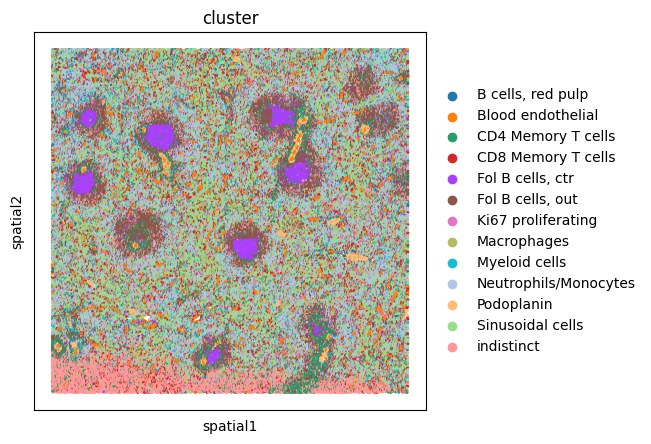

In [324]:
sq.pl.spatial_scatter(
        pkhl_2_ann,
        shape=None,
        color = "cluster",
        size=3
)

In [325]:
sq.gr.co_occurrence(pkhl_2_ann, cluster_key="cluster")

100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 2926/2926 [17:38<00:00,  2.76/s]


In [326]:
pkhl_2_ann.uns

OverloadedDict, wrapping:
	OrderedDict([('cluster_colors', ['#1f77b4', '#ff7f0e', '#279e68', '#d62728', '#aa40fc', '#8c564b', '#e377c2', '#b5bd61', '#17becf', '#aec7e8', '#ffbb78', '#98df8a', '#ff9896']), ('cluster_co_occurrence', {'occ': array([[[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]],

       [[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]],

       [[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan]

another idea:
maybe some cell types aren't in every split and therefore this is causing nans to occur? take subset that does have all cell types and test if it works. Then take one that does not. 

# FSLD

In [346]:
fsld_meta = datatable.fread("/Users/brendan/Desktop/PostDoc/work/HuBMAP/repos/multiscale_celltype_colocalization_analysis/data/CODEX/HBM342.FSLD.938.meta.csv.gz")
fsld_meta = fsld_meta.to_pandas()
fsld_meta.head()

C0  x    y  cellarea com_nn50_VolnormExpr_data_annots_byPBVNharmonized
0   1  0  -42       219                                       Macrophages
1   2  0 -167       225                                  Sinusoidal cells
2   3  0 -281       440                                  Sinusoidal cells
3   4  0 -306       151                                        indistinct
4   5  0 -368       195                                        indistinct

In [347]:
# I think the co-occurances are coming out as nans and thus not plotted because the y is negative?
fsld_meta['y'] = fsld_meta['y'] * -1
fsld_meta.iloc[:,1:3]

x     y
0           0    42
1           0   167
2           0   281
3           0   306
4           0   368
...       ...   ...
226379  11789  8682
226380  12095  8995
226381  12095  9006
226382  12095  9071
226383  11789  8992

[226384 rows x 2 columns]

In [351]:
fsld_exp = datatable.fread("/Users/brendan/Desktop/PostDoc/work/HuBMAP/repos/multiscale_celltype_colocalization_analysis/data/CODEX/HBM342.FSLD.938.exp.csv.gz")
fsld_exp = fsld_exp.to_pandas().astype('int64')
fsld_exp.head()

C0  CD31   CD8  CD20  Ki67  CD3e  SMActin  Podoplanin  CD68  PanCK  ...  \
0   1    19    30   405    74    53       52         127   408     22  ...   
1   2   125  3007    51   293   113       42         359    71     49  ...   
2   3    69  1065    56   189    43       28         163    53     38  ...   
3   4    68   883    36   153    12       30         123    37     31  ...   
4   5    40   340    39   205    51       35         182    90     25  ...   

   CD44  HLADR  FoxP3  CD163  CollagenIV  Vimentin  CD15  CD45  CD5  CD1c  
0   210     75    211   1024         254       130   262    56  179    56  
1   103     73    266     39         218       409   128    50  148    56  
2   148     58    321    119         131       118   293    53  148    74  
3   116     73    242     76         141        50   717    59  199    74  
4   110     56    199    123         200        67    46    54  239    63  

[5 rows x 29 columns]

In [352]:
fsld_meta['com_nn50_VolnormExpr_data_annots_byPBVNharmonized'] = fsld_meta['com_nn50_VolnormExpr_data_annots_byPBVNharmonized'].astype("category") # like levels in R, need for squidpy stuff
fsld_meta['com_nn50_VolnormExpr_data_annots_byPBVNharmonized']

0                Macrophages
1           Sinusoidal cells
2           Sinusoidal cells
3                 indistinct
4                 indistinct
                 ...        
226379    CD8 Memory T cells
226380           Macrophages
226381           Macrophages
226382            indistinct
226383     B cells, red pulp
Name: com_nn50_VolnormExpr_data_annots_byPBVNharmonized, Length: 226384, dtype: category
Categories (13, object): ['B cells, red pulp', 'Blood endothelial', 'CD4 Memory T cells', 'CD8 Memory T cells', ..., 'Neutrophils/Monocytes', 'Podoplanin', 'Sinusoidal cells', 'indistinct']

In [353]:
fsld = AnnData(np.array(fsld_exp.iloc[:,1:]), obsm={"spatial": np.array(fsld_meta.iloc[:,1:3], dtype=float)})

/var/folders/cf/llylf0sn67j0qlvgy3_990ym0000gn/T/ipykernel_88159/715646998.py:1: FutureWarning: X.dtype being converted to np.float32 from int64. In the next version of anndata (0.9) conversion will not be automatic. Pass dtype explicitly to avoid this warning. Pass `AnnData(X, dtype=X.dtype, ...)` to get the future behavour.
  fsld = AnnData(np.array(fsld_exp.iloc[:,1:]), obsm={"spatial": np.array(fsld_meta.iloc[:,1:3], dtype=float)})


In [355]:
fsld.obs = fsld_meta
fsld.obs

C0      x     y  cellarea  \
0            1      0    42       219   
1            2      0   167       225   
2            3      0   281       440   
3            4      0   306       151   
4            5      0   368       195   
...        ...    ...   ...       ...   
226379  226380  11789  8682       740   
226380  226381  12095  8995       111   
226381  226382  12095  9006       100   
226382  226383  12095  9071        91   
226383  226384  11789  8992       323   

       com_nn50_VolnormExpr_data_annots_byPBVNharmonized  
0                                            Macrophages  
1                                       Sinusoidal cells  
2                                       Sinusoidal cells  
3                                             indistinct  
4                                             indistinct  
...                                                  ...  
226379                                CD8 Memory T cells  
226380                                       Macrophages  
226381                                       Macrophages  
226382                                        indistinct  
226383                                 B cells, red pulp  

[226384 rows x 5 columns]

/opt/miniconda3/envs/squidpy/lib/python3.8/site-packages/squidpy/pl/_spatial_utils.py:955: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap', 'norm' will be ignored
  _cax = scatter(


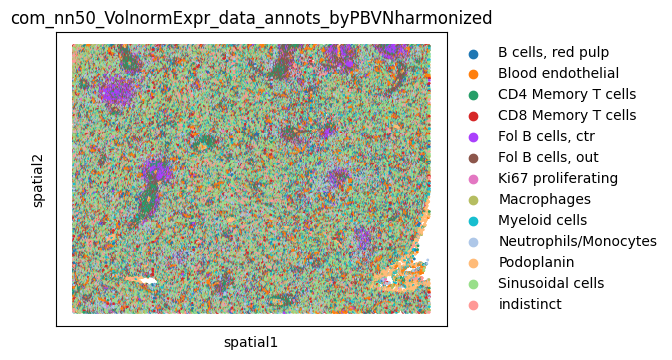

In [356]:
sq.pl.spatial_scatter(
        fsld,
        shape=None,
        color = "com_nn50_VolnormExpr_data_annots_byPBVNharmonized",
        size=3
)

In [357]:
sq.gr.co_occurrence(fsld, cluster_key="com_nn50_VolnormExpr_data_annots_byPBVNharmonized")

100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 6216/6216 [34:43<00:00,  2.98/s]


In [359]:
fsld.uns["com_nn50_VolnormExpr_data_annots_byPBVNharmonized_co_occurrence"]

{'occ': array([[[nan, nan, nan, ..., nan, nan, nan],
         [nan, nan, nan, ..., nan, nan, nan],
         [nan, nan, nan, ..., nan, nan, nan],
         ...,
         [nan, nan, nan, ..., nan, nan, nan],
         [nan, nan, nan, ..., nan, nan, nan],
         [nan, nan, nan, ..., nan, nan, nan]],
 
        [[nan, nan, nan, ..., nan, nan, nan],
         [nan, nan, nan, ..., nan, nan, nan],
         [nan, nan, nan, ..., nan, nan, nan],
         ...,
         [nan, nan, nan, ..., nan, nan, nan],
         [nan, nan, nan, ..., nan, nan, nan],
         [nan, nan, nan, ..., nan, nan, nan]],
 
        [[nan, nan, nan, ..., nan, nan, nan],
         [nan, nan, nan, ..., nan, nan, nan],
         [nan, nan, nan, ..., nan, nan, nan],
         ...,
         [nan, nan, nan, ..., nan, nan, nan],
         [nan, nan, nan, ..., nan, nan, nan],
         [nan, nan, nan, ..., nan, nan, nan]],
 
        ...,
 
        [[nan, nan, nan, ..., nan, nan, nan],
         [nan, nan, nan, ..., nan, nan, nan],
       